# Federated Learning for Melanoma Classification

## Objective 1: Developing a classification model for Melanoma

## Feature Extracted Dataset - Training & Optimizing Centralised Model

### Import Modules & Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time
import pickle
import random
import sklearn


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import  confusion_matrix, roc_curve

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as tf
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations as A
from torch.cuda import amp
from tqdm.notebook import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from utils import *
from Visualise import *
from ResizeImages import *
from MelanomaDataset import *
from MelanomaEfficientNet import *
from TrainVal import *
from Test import *
from Plot import *
from FocalLoss import *

### Package Versions

In [2]:
print(f"Python: {sys.version}")
print(f"Numpy Version: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"Torch: {torch.__version__}")

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy Version: 1.21.2
matplotlib: 3.4.3
sklearn: 0.24.2
Torch: 1.8.0+cu111


In [3]:
# Working directory
os.getcwd()

'C:\\Users\\sarah\\Documents\\MSc AI 2020_2021\\Research Project\\Federated-Learning-Melanoma'

In [4]:
# Seed everything
set_seed(random_seed=5)

In [5]:
# Set device to GPU if available
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Part I: Generating a feature based dataset, extracted original images
- Create a MelanomaDataset based on image data
- Extract features with EfficientNet-b0 model
- Feature data are saved in the Data\feature_crop_resize_256x256\train folder
- MelanomaDataset is modified to load feature data during training if and when feature folder is specified

In [6]:
dataset=MelanomaDataset(mode='train', img_dir="Data/jpeg_crop_resize_256x256/train/", metadata_dir= "Data/Train_Metadata_Processed.csv", transform=True)

In [7]:
feature_extractor = get_efficientnet_feature_extractor('efficientnet-b0')

Loaded pretrained weights for efficientnet-b0


### Last layer of EfficientNet-b0 model is set as a linear layer with no bias with identity matrix 1280x1280 as parameter 

In [8]:
for param in feature_extractor._fc.parameters():
    print(param)

Parameter containing:
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


### Extracting the features with generate_data_feature_cache function

In [9]:
generate_data_feature_cache(dataset,feature_extractor,"Data/feature_crop_resize_256x256/train/",device,extraction_batch_size=32)

Batch 0 Feature data saving done
Batch 1 Feature data saving done
Batch 2 Feature data saving done
Batch 3 Feature data saving done
Batch 4 Feature data saving done
Batch 5 Feature data saving done
Batch 6 Feature data saving done
Batch 7 Feature data saving done
Batch 8 Feature data saving done
Batch 9 Feature data saving done
Batch 10 Feature data saving done
Batch 11 Feature data saving done
Batch 12 Feature data saving done
Batch 13 Feature data saving done
Batch 14 Feature data saving done
Batch 15 Feature data saving done
Batch 16 Feature data saving done
Batch 17 Feature data saving done
Batch 18 Feature data saving done
Batch 19 Feature data saving done
Batch 20 Feature data saving done
Batch 21 Feature data saving done
Batch 22 Feature data saving done
Batch 23 Feature data saving done
Batch 24 Feature data saving done
Batch 25 Feature data saving done
Batch 26 Feature data saving done
Batch 27 Feature data saving done
Batch 28 Feature data saving done
Batch 29 Feature data sa

Batch 238 Feature data saving done
Batch 239 Feature data saving done
Batch 240 Feature data saving done
Batch 241 Feature data saving done
Batch 242 Feature data saving done
Batch 243 Feature data saving done
Batch 244 Feature data saving done
Batch 245 Feature data saving done
Batch 246 Feature data saving done
Batch 247 Feature data saving done
Batch 248 Feature data saving done
Batch 249 Feature data saving done
Batch 250 Feature data saving done
Batch 251 Feature data saving done
Batch 252 Feature data saving done
Batch 253 Feature data saving done
Batch 254 Feature data saving done
Batch 255 Feature data saving done
Batch 256 Feature data saving done
Batch 257 Feature data saving done
Batch 258 Feature data saving done
Batch 259 Feature data saving done
Batch 260 Feature data saving done
Batch 261 Feature data saving done
Batch 262 Feature data saving done
Batch 263 Feature data saving done
Batch 264 Feature data saving done
Batch 265 Feature data saving done
Batch 266 Feature da

Batch 473 Feature data saving done
Batch 474 Feature data saving done
Batch 475 Feature data saving done
Batch 476 Feature data saving done
Batch 477 Feature data saving done
Batch 478 Feature data saving done
Batch 479 Feature data saving done
Batch 480 Feature data saving done
Batch 481 Feature data saving done
Batch 482 Feature data saving done
Batch 483 Feature data saving done
Batch 484 Feature data saving done
Batch 485 Feature data saving done
Batch 486 Feature data saving done
Batch 487 Feature data saving done
Batch 488 Feature data saving done
Batch 489 Feature data saving done
Batch 490 Feature data saving done
Batch 491 Feature data saving done
Batch 492 Feature data saving done
Batch 493 Feature data saving done
Batch 494 Feature data saving done
Batch 495 Feature data saving done
Batch 496 Feature data saving done
Batch 497 Feature data saving done
Batch 498 Feature data saving done
Batch 499 Feature data saving done
Batch 500 Feature data saving done
Batch 501 Feature da

Batch 708 Feature data saving done
Batch 709 Feature data saving done
Batch 710 Feature data saving done
Batch 711 Feature data saving done
Batch 712 Feature data saving done
Batch 713 Feature data saving done
Batch 714 Feature data saving done
Batch 715 Feature data saving done
Batch 716 Feature data saving done
Batch 717 Feature data saving done
Batch 718 Feature data saving done
Batch 719 Feature data saving done
Batch 720 Feature data saving done
Batch 721 Feature data saving done
Batch 722 Feature data saving done
Batch 723 Feature data saving done
Batch 724 Feature data saving done
Batch 725 Feature data saving done
Batch 726 Feature data saving done
Batch 727 Feature data saving done
Batch 728 Feature data saving done
Batch 729 Feature data saving done
Batch 730 Feature data saving done
Batch 731 Feature data saving done
Batch 732 Feature data saving done
Batch 733 Feature data saving done
Batch 734 Feature data saving done
Batch 735 Feature data saving done
Batch 736 Feature da

Batch 943 Feature data saving done
Batch 944 Feature data saving done
Batch 945 Feature data saving done
Batch 946 Feature data saving done
Batch 947 Feature data saving done
Batch 948 Feature data saving done
Batch 949 Feature data saving done
Batch 950 Feature data saving done
Batch 951 Feature data saving done
Batch 952 Feature data saving done
Batch 953 Feature data saving done
Batch 954 Feature data saving done
Batch 955 Feature data saving done
Batch 956 Feature data saving done
Batch 957 Feature data saving done
Batch 958 Feature data saving done
Batch 959 Feature data saving done
Batch 960 Feature data saving done
Batch 961 Feature data saving done
Batch 962 Feature data saving done
Batch 963 Feature data saving done
Batch 964 Feature data saving done
Batch 965 Feature data saving done
Batch 966 Feature data saving done
Batch 967 Feature data saving done
Batch 968 Feature data saving done
Batch 969 Feature data saving done
Batch 970 Feature data saving done
Batch 971 Feature da

### Evaluating training on feature dataset

- Feature based dataset is initially test with a single linear layer classifier
- Time of training and validation is completed is faster by 50% compared that the training time when it is performed with image based dataset.
- Results also show comparable validation results.

In [6]:
#loading dataset that uses generated feature data

dataset=MelanomaDataset(mode='train', img_dir="Data/jpeg_crop_resize_256x256/train/", metadata_dir= "Data/Train_Metadata_Processed.csv",
                        transform=True,X_as_feature=True,feature_dir="Data/feature_crop_resize_256x256/train/")

In [6]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/")
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [11]:
# Instantiate Model
s_model= SimpleLinear()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(s_model.parameters(), lr=learning_rate)

In [12]:
Base_featureDS_training= train_val_clip(s_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="Base_featureDS_training")


 epoch: 0, train loss: 0.134594, val loss: 0.082311, train acc: 0.9785, val acc: 0.9830, val roc:0.7152



 epoch: 1, train loss: 0.094226, val loss: 0.079227, train acc: 0.9790, val acc: 0.9830, val roc:0.7683



 epoch: 2, train loss: 0.085209, val loss: 0.078534, train acc: 0.9803, val acc: 0.9830, val roc:0.7924



 epoch: 3, train loss: 0.084128, val loss: 0.077080, train acc: 0.9803, val acc: 0.9831, val roc:0.7979



 epoch: 4, train loss: 0.083565, val loss: 0.076024, train acc: 0.9807, val acc: 0.9830, val roc:0.8035



 epoch: 5, train loss: 0.077223, val loss: 0.075342, train acc: 0.9819, val acc: 0.9833, val roc:0.8111



 epoch: 6, train loss: 0.079893, val loss: 0.074887, train acc: 0.9811, val acc: 0.9833, val roc:0.8218



 epoch: 7, train loss: 0.080469, val loss: 0.074553, train acc: 0.9805, val acc: 0.9831, val roc:0.8236



 epoch: 8, train loss: 0.080146, val loss: 0.073822, train acc: 0.9808, val acc: 0.9833, val roc:0.8291



 epoch: 9, train loss: 0.078937, val loss: 0.073678, train acc: 0.9804, val acc: 0.9834, val roc:0.8360



 epoch: 10, train loss: 0.074756, val loss: 0.072701, train acc: 0.9816, val acc: 0.9834, val roc:0.8370



 epoch: 11, train loss: 0.076276, val loss: 0.072480, train acc: 0.9810, val acc: 0.9833, val roc:0.8424



 epoch: 12, train loss: 0.077369, val loss: 0.072517, train acc: 0.9811, val acc: 0.9833, val roc:0.8405



 epoch: 13, train loss: 0.080129, val loss: 0.072691, train acc: 0.9799, val acc: 0.9833, val roc:0.8446



 epoch: 14, train loss: 0.076218, val loss: 0.072196, train acc: 0.9805, val acc: 0.9833, val roc:0.8428
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_Base_featureDS_training.pth.tar saved.
Training Finished
Training and validation time: 4514.885925769806 seconds


### We repeat the previous test with memory cache to estimate the improvement of using the cache

- Results shows training time reduction by 90% which suggest the impact of data loading has large contribution on the training and validation time

In [ ]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [8]:
# Instantiate Model
s_model= SimpleLinear()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(s_model.parameters(), lr=learning_rate)

In [9]:
BaseCache_featureDS_training= train_val_clip(s_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_training")


 epoch: 0, train loss: 0.131088, val loss: 0.082675, train acc: 0.9797, val acc: 0.9830, val roc:0.7116



 epoch: 1, train loss: 0.094126, val loss: 0.079527, train acc: 0.9792, val acc: 0.9830, val roc:0.7655



 epoch: 2, train loss: 0.085232, val loss: 0.078724, train acc: 0.9805, val acc: 0.9830, val roc:0.7910



 epoch: 3, train loss: 0.083663, val loss: 0.077262, train acc: 0.9806, val acc: 0.9830, val roc:0.7970



 epoch: 4, train loss: 0.083245, val loss: 0.076195, train acc: 0.9807, val acc: 0.9830, val roc:0.8031



 epoch: 5, train loss: 0.077227, val loss: 0.075465, train acc: 0.9820, val acc: 0.9828, val roc:0.8114



 epoch: 6, train loss: 0.079935, val loss: 0.074951, train acc: 0.9812, val acc: 0.9831, val roc:0.8223



 epoch: 7, train loss: 0.080369, val loss: 0.074618, train acc: 0.9805, val acc: 0.9830, val roc:0.8240



 epoch: 8, train loss: 0.080023, val loss: 0.073867, train acc: 0.9809, val acc: 0.9831, val roc:0.8300



 epoch: 9, train loss: 0.078934, val loss: 0.073690, train acc: 0.9804, val acc: 0.9833, val roc:0.8367



 epoch: 10, train loss: 0.074662, val loss: 0.072719, train acc: 0.9817, val acc: 0.9834, val roc:0.8376



 epoch: 11, train loss: 0.076132, val loss: 0.072472, train acc: 0.9811, val acc: 0.9833, val roc:0.8433



 epoch: 12, train loss: 0.077285, val loss: 0.072502, train acc: 0.9810, val acc: 0.9833, val roc:0.8414



 epoch: 13, train loss: 0.079993, val loss: 0.072657, train acc: 0.9799, val acc: 0.9833, val roc:0.8455



 epoch: 14, train loss: 0.076112, val loss: 0.072165, train acc: 0.9805, val acc: 0.9833, val roc:0.8439
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_training.pth.tar saved.
Training Finished
Training and validation time: 442.16742038726807 seconds


In [10]:
BaseCache_featureDS_test_results, BaseCache_featureDS_roc= test(s_model, test_loader=test_loader, device=device)

In [11]:
# Test results using featured based dataset and memory cache
BaseCache_featureDS_test_results

{'test_accuracy': 0.9815086586439683,
 'test_roc_score': 0.8225155692260955,
 'CM': array([[3344,    0],
        [  63,    0]], dtype=int64)}

# Part II: Melanoma classification model with feature based dataset

This section covers different testing for improved classification performance, covering:

- Model architecture: testing different number of layers and layers sizes.
- Loss function: comparing the results of training with BCEWithLogitsLoss vs Focal Loss function
- Training parameters: Batch size, number of Epochs, learning rate
- Data augmentation and oversampling


### 1- Model Architecture:
- Classifier architecture with double and triple linear layers explored
- Single, double and triple layer models with Sigmoid activation 
- Different architectures were tested with different learning rate and batch size 


### Double layer linear classifier L1:[1280,512] L2:[512,1] 

In [11]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [12]:
# Instantiate Model
d_model= DoubleLinear()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [13]:
BaseCache_featureDS_DL_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DL_training")


 epoch: 0, train loss: 0.088696, val loss: 0.074516, train acc: 0.9798, val acc: 0.9828, val roc:0.8168



 epoch: 1, train loss: 0.083287, val loss: 0.073612, train acc: 0.9790, val acc: 0.9828, val roc:0.8393



 epoch: 2, train loss: 0.074680, val loss: 0.086360, train acc: 0.9809, val acc: 0.9802, val roc:0.8562



 epoch: 3, train loss: 0.072371, val loss: 0.077535, train acc: 0.9811, val acc: 0.9813, val roc:0.8555



 epoch: 4, train loss: 0.071200, val loss: 0.074072, train acc: 0.9813, val acc: 0.9822, val roc:0.8555



 epoch: 5, train loss: 0.066019, val loss: 0.070893, train acc: 0.9831, val acc: 0.9831, val roc:0.8642



 epoch: 6, train loss: 0.068457, val loss: 0.071058, train acc: 0.9821, val acc: 0.9830, val roc:0.8611



 epoch: 7, train loss: 0.067174, val loss: 0.070294, train acc: 0.9812, val acc: 0.9833, val roc:0.8625



 epoch: 8, train loss: 0.064725, val loss: 0.074077, train acc: 0.9818, val acc: 0.9814, val roc:0.8631



 epoch: 9, train loss: 0.062593, val loss: 0.072998, train acc: 0.9820, val acc: 0.9799, val roc:0.8651



 epoch: 10, train loss: 0.058932, val loss: 0.074856, train acc: 0.9833, val acc: 0.9801, val roc:0.8570



 epoch: 11, train loss: 0.059723, val loss: 0.073617, train acc: 0.9824, val acc: 0.9816, val roc:0.8603



 epoch: 12, train loss: 0.060288, val loss: 0.073313, train acc: 0.9824, val acc: 0.9819, val roc:0.8495



 epoch: 13, train loss: 0.061994, val loss: 0.082201, train acc: 0.9821, val acc: 0.9763, val roc:0.8527



 epoch: 14, train loss: 0.058268, val loss: 0.075792, train acc: 0.9822, val acc: 0.9808, val roc:0.8430
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DL_training.pth.tar saved.
Training Finished
Training and validation time: 221.945734500885 seconds


### Triple layer linear classifier L1:[1280,512] L2:[512,256] L3:[256,1]

In [14]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [15]:
# Instantiate Model
t_model= TripleLinear()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [16]:
BaseCache_featureDS_TL_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_TL_training")


 epoch: 0, train loss: 0.089589, val loss: 0.074211, train acc: 0.9802, val acc: 0.9828, val roc:0.8182



 epoch: 1, train loss: 0.083029, val loss: 0.076079, train acc: 0.9789, val acc: 0.9827, val roc:0.8350



 epoch: 2, train loss: 0.074253, val loss: 0.082158, train acc: 0.9809, val acc: 0.9813, val roc:0.8563



 epoch: 3, train loss: 0.071669, val loss: 0.080852, train acc: 0.9811, val acc: 0.9784, val roc:0.8592



 epoch: 4, train loss: 0.070320, val loss: 0.076526, train acc: 0.9814, val acc: 0.9811, val roc:0.8524



 epoch: 5, train loss: 0.065433, val loss: 0.071118, train acc: 0.9833, val acc: 0.9827, val roc:0.8637



 epoch: 6, train loss: 0.067761, val loss: 0.072069, train acc: 0.9822, val acc: 0.9830, val roc:0.8576



 epoch: 7, train loss: 0.066243, val loss: 0.070863, train acc: 0.9813, val acc: 0.9828, val roc:0.8602



 epoch: 8, train loss: 0.063767, val loss: 0.073944, train acc: 0.9816, val acc: 0.9811, val roc:0.8586



 epoch: 9, train loss: 0.061499, val loss: 0.074308, train acc: 0.9821, val acc: 0.9804, val roc:0.8623



 epoch: 10, train loss: 0.057801, val loss: 0.077404, train acc: 0.9834, val acc: 0.9792, val roc:0.8521



 epoch: 11, train loss: 0.058876, val loss: 0.076293, train acc: 0.9822, val acc: 0.9821, val roc:0.8540



 epoch: 12, train loss: 0.059254, val loss: 0.074960, train acc: 0.9825, val acc: 0.9821, val roc:0.8434



 epoch: 13, train loss: 0.061046, val loss: 0.085292, train acc: 0.9820, val acc: 0.9749, val roc:0.8444



 epoch: 14, train loss: 0.057644, val loss: 0.078130, train acc: 0.9822, val acc: 0.9804, val roc:0.8332
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TL_training.pth.tar saved.
Training Finished
Training and validation time: 192.59282112121582 seconds


In [2]:
res_sl = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_training.pth.tar')
res_dl = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DL_training.pth.tar')
res_tl = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TL_training.pth.tar')

#### Notes:
Double and triple linear layers perform better compared to a single linear layer classifier, theoretically the three models are equivalent. The difference in performance could be due to flexibility of the double and triple layer during the optimization. This also explains the reason why there is overfitting with the double and triple linear layers for epochs higher than 8.

- We focus on double and single layers in subsequent tests


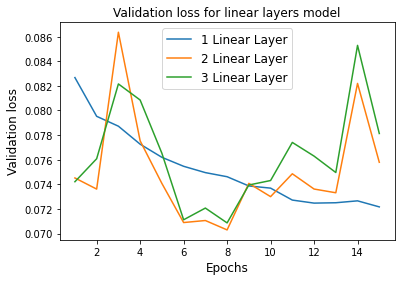

In [3]:
plt.plot(range(1,16),res_sl['val_loss'], label='1 Linear Layer')
plt.plot(range(1,16),res_dl['val_loss'], label='2 Linear Layer')
plt.plot(range(1,16),res_tl['val_loss'], label='3 Linear Layer')

plt.title("Validation loss for linear layers model")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

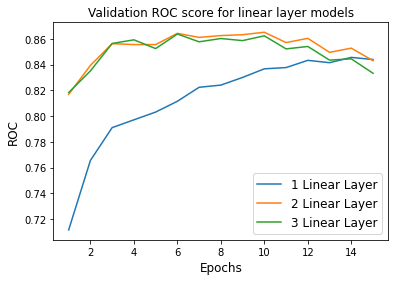

In [4]:
plt.plot(range(1,16),res_sl['val_roc'], label='1 Linear Layer')
plt.plot(range(1,16),res_dl['val_roc'], label='2 Linear Layer')
plt.plot(range(1,16),res_tl['val_roc'], label='3 Linear Layer')

plt.title("Validation ROC score for linear layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("ROC", fontsize=12)
plt.show()

### Impact of adding Sigmoid activation to the model:

### Double layer linear Sigmoid classifier

In [104]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [105]:
# Instantiate Model
d_model= DoubleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [106]:
BaseCache_featureDS_DLS_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DLS_training")


 epoch: 0, train loss: 0.100290, val loss: 0.077344, train acc: 0.9785, val acc: 0.9830, val roc:0.7863



 epoch: 1, train loss: 0.088053, val loss: 0.074084, train acc: 0.9792, val acc: 0.9830, val roc:0.8327



 epoch: 2, train loss: 0.079298, val loss: 0.078866, train acc: 0.9805, val acc: 0.9828, val roc:0.8457



 epoch: 3, train loss: 0.076898, val loss: 0.074174, train acc: 0.9806, val acc: 0.9831, val roc:0.8439



 epoch: 4, train loss: 0.076273, val loss: 0.072118, train acc: 0.9808, val acc: 0.9830, val roc:0.8503



 epoch: 5, train loss: 0.070531, val loss: 0.071419, train acc: 0.9821, val acc: 0.9831, val roc:0.8583



 epoch: 6, train loss: 0.072755, val loss: 0.070184, train acc: 0.9815, val acc: 0.9830, val roc:0.8623



 epoch: 7, train loss: 0.072655, val loss: 0.070002, train acc: 0.9807, val acc: 0.9833, val roc:0.8629



 epoch: 8, train loss: 0.071404, val loss: 0.070442, train acc: 0.9810, val acc: 0.9830, val roc:0.8639



 epoch: 9, train loss: 0.069853, val loss: 0.069713, train acc: 0.9808, val acc: 0.9830, val roc:0.8706



 epoch: 10, train loss: 0.066313, val loss: 0.069146, train acc: 0.9821, val acc: 0.9831, val roc:0.8695



 epoch: 11, train loss: 0.066668, val loss: 0.068809, train acc: 0.9815, val acc: 0.9833, val roc:0.8745



 epoch: 12, train loss: 0.067565, val loss: 0.069178, train acc: 0.9818, val acc: 0.9831, val roc:0.8706



 epoch: 13, train loss: 0.069989, val loss: 0.070301, train acc: 0.9801, val acc: 0.9828, val roc:0.8720



 epoch: 14, train loss: 0.065487, val loss: 0.069633, train acc: 0.9809, val acc: 0.9828, val roc:0.8700
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_training.pth.tar saved.
Training Finished
Training and validation time: 213.66049075126648 seconds


### Double layer linear Sigmoid classifier - Higher learning rate

In [107]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [108]:
# Instantiate Model
d_model= DoubleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [109]:
BaseCache_featureDS_DLS_HLR_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DLS_HLR_training")


 epoch: 0, train loss: 0.085618, val loss: 0.073233, train acc: 0.9789, val acc: 0.9830, val roc:0.8351



 epoch: 1, train loss: 0.080464, val loss: 0.077802, train acc: 0.9792, val acc: 0.9827, val roc:0.8420



 epoch: 2, train loss: 0.071815, val loss: 0.078889, train acc: 0.9810, val acc: 0.9827, val roc:0.8577



 epoch: 3, train loss: 0.068035, val loss: 0.083046, train acc: 0.9816, val acc: 0.9790, val roc:0.8578



 epoch: 4, train loss: 0.065244, val loss: 0.077056, train acc: 0.9819, val acc: 0.9808, val roc:0.8557



 epoch: 5, train loss: 0.059507, val loss: 0.072240, train acc: 0.9838, val acc: 0.9819, val roc:0.8624



 epoch: 6, train loss: 0.059377, val loss: 0.075965, train acc: 0.9834, val acc: 0.9830, val roc:0.8464



 epoch: 7, train loss: 0.055567, val loss: 0.073774, train acc: 0.9840, val acc: 0.9825, val roc:0.8435



 epoch: 8, train loss: 0.049669, val loss: 0.082153, train acc: 0.9851, val acc: 0.9793, val roc:0.8559



 epoch: 9, train loss: 0.046496, val loss: 0.080771, train acc: 0.9859, val acc: 0.9819, val roc:0.8458



 epoch: 10, train loss: 0.037993, val loss: 0.084907, train acc: 0.9879, val acc: 0.9807, val roc:0.8476



 epoch: 11, train loss: 0.037987, val loss: 0.093695, train acc: 0.9881, val acc: 0.9811, val roc:0.8464



 epoch: 12, train loss: 0.034703, val loss: 0.092807, train acc: 0.9888, val acc: 0.9814, val roc:0.8116



 epoch: 13, train loss: 0.031359, val loss: 0.100499, train acc: 0.9892, val acc: 0.9722, val roc:0.8384



 epoch: 14, train loss: 0.025453, val loss: 0.095685, train acc: 0.9916, val acc: 0.9786, val roc:0.8165
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_training.pth.tar saved.
Training Finished
Training and validation time: 214.3660876750946 seconds


### Triple layer linear classifier

In [6]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [7]:
# Instantiate Model
t_model= TripleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [8]:
BaseCache_featureDS_TLS_LR_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_TLS_LR_training")


 epoch: 0, train loss: 0.106161, val loss: 0.081283, train acc: 0.9789, val acc: 0.9830, val roc:0.7732



 epoch: 1, train loss: 0.091925, val loss: 0.076968, train acc: 0.9790, val acc: 0.9830, val roc:0.8123



 epoch: 2, train loss: 0.082654, val loss: 0.080148, train acc: 0.9805, val acc: 0.9830, val roc:0.8320



 epoch: 3, train loss: 0.079412, val loss: 0.075224, train acc: 0.9806, val acc: 0.9830, val roc:0.8354



 epoch: 4, train loss: 0.078544, val loss: 0.073118, train acc: 0.9803, val acc: 0.9830, val roc:0.8435



 epoch: 5, train loss: 0.072733, val loss: 0.072578, train acc: 0.9819, val acc: 0.9830, val roc:0.8516



 epoch: 6, train loss: 0.074470, val loss: 0.071012, train acc: 0.9811, val acc: 0.9830, val roc:0.8595



 epoch: 7, train loss: 0.074145, val loss: 0.070946, train acc: 0.9805, val acc: 0.9830, val roc:0.8591



 epoch: 8, train loss: 0.072699, val loss: 0.071223, train acc: 0.9809, val acc: 0.9828, val roc:0.8604



 epoch: 9, train loss: 0.071812, val loss: 0.070402, train acc: 0.9805, val acc: 0.9828, val roc:0.8685



 epoch: 10, train loss: 0.067863, val loss: 0.069789, train acc: 0.9820, val acc: 0.9828, val roc:0.8688



 epoch: 11, train loss: 0.067992, val loss: 0.069333, train acc: 0.9812, val acc: 0.9828, val roc:0.8736



 epoch: 12, train loss: 0.068891, val loss: 0.069613, train acc: 0.9815, val acc: 0.9830, val roc:0.8697



 epoch: 13, train loss: 0.071034, val loss: 0.070261, train acc: 0.9797, val acc: 0.9827, val roc:0.8721



 epoch: 14, train loss: 0.066400, val loss: 0.069917, train acc: 0.9806, val acc: 0.9827, val roc:0.8710
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_LR_training.pth.tar saved.
Training Finished
Training and validation time: 201.02200031280518 seconds


### Triple layer linear classifier- Higher learning rate

In [9]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=32, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [10]:
# Instantiate Model
t_model= TripleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [11]:
BaseCache_featureDS_TLS_HLR_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_TLS_HLR_training")


 epoch: 0, train loss: 0.088435, val loss: 0.074602, train acc: 0.9789, val acc: 0.9830, val roc:0.8281



 epoch: 1, train loss: 0.082808, val loss: 0.079520, train acc: 0.9790, val acc: 0.9830, val roc:0.8384



 epoch: 2, train loss: 0.074106, val loss: 0.077899, train acc: 0.9805, val acc: 0.9827, val roc:0.8568



 epoch: 3, train loss: 0.068430, val loss: 0.079277, train acc: 0.9811, val acc: 0.9790, val roc:0.8570



 epoch: 4, train loss: 0.065718, val loss: 0.078532, train acc: 0.9814, val acc: 0.9798, val roc:0.8517



 epoch: 5, train loss: 0.059270, val loss: 0.074218, train acc: 0.9835, val acc: 0.9808, val roc:0.8628



 epoch: 6, train loss: 0.057411, val loss: 0.076988, train acc: 0.9833, val acc: 0.9817, val roc:0.8445



 epoch: 7, train loss: 0.052769, val loss: 0.078578, train acc: 0.9845, val acc: 0.9827, val roc:0.8510



 epoch: 8, train loss: 0.045526, val loss: 0.086440, train acc: 0.9864, val acc: 0.9781, val roc:0.8516



 epoch: 9, train loss: 0.042183, val loss: 0.094312, train acc: 0.9869, val acc: 0.9821, val roc:0.8481



 epoch: 10, train loss: 0.033201, val loss: 0.087971, train acc: 0.9894, val acc: 0.9808, val roc:0.8473



 epoch: 11, train loss: 0.031299, val loss: 0.102446, train acc: 0.9900, val acc: 0.9804, val roc:0.8437



 epoch: 12, train loss: 0.026781, val loss: 0.107193, train acc: 0.9920, val acc: 0.9786, val roc:0.8212



 epoch: 13, train loss: 0.022349, val loss: 0.113814, train acc: 0.9925, val acc: 0.9697, val roc:0.8375



 epoch: 14, train loss: 0.020170, val loss: 0.109707, train acc: 0.9934, val acc: 0.9770, val roc:0.8312
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_training.pth.tar saved.
Training Finished
Training and validation time: 199.69335532188416 seconds


In [5]:
res_dls = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_training.pth.tar')
res_dls_hlr = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_training.pth.tar')
res_tls = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_LR_training.pth.tar')
res_tls_hlr = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_training.pth.tar')

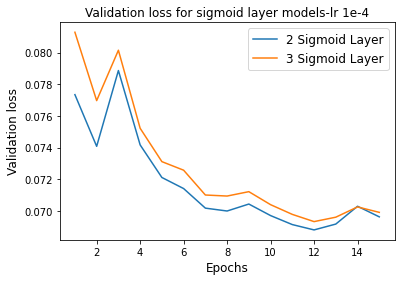

In [6]:
plt.plot(range(1,16),res_dls['val_loss'], label='2 Sigmoid Layer')
plt.plot(range(1,16),res_tls['val_loss'], label='3 Sigmoid Layer')

plt.title("Validation loss for sigmoid layer models-lr 1e-4")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

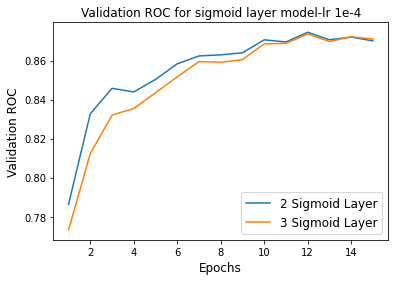

In [7]:
plt.plot(range(1,16),res_dls['val_roc'], label='2 Sigmoid Layer')
plt.plot(range(1,16),res_tls['val_roc'], label='3 Sigmoid Layer')

plt.title("Validation ROC for sigmoid layer model-lr 1e-4")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

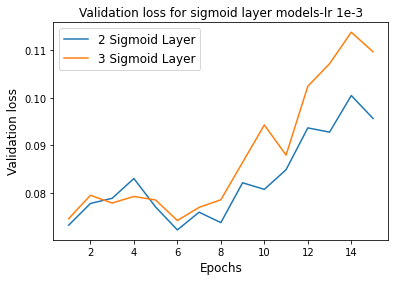

In [8]:
plt.plot(range(1,16),res_dls_hlr['val_loss'], label='2 Sigmoid Layer')
plt.plot(range(1,16),res_tls_hlr['val_loss'], label='3 Sigmoid Layer')

plt.title("Validation loss for sigmoid layer models-lr 1e-3")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

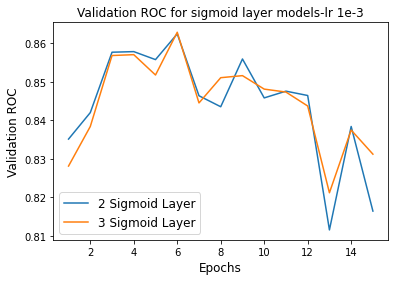

In [9]:
plt.plot(range(1,16),res_dls_hlr['val_roc'], label='2 Sigmoid Layer')
plt.plot(range(1,16),res_tls_hlr['val_roc'], label='3 Sigmoid Layer')

plt.title("Validation ROC for sigmoid layer models-lr 1e-3")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

### Notes:

-The learning rate 1e-4 is the most suitable as gives better validation loss and ROC, the double sigmoid model seems to perform better than triple sigmoid model

In [17]:
print("Maximum ROC Double Sigmoid model, learning rate 1e-4: "+str(max(res_dls['val_roc'])))
print("Maximum ROC Double Sigmoid model, learning rate 1e-3: "+str(max(res_dls_hlr['val_roc'])))
print("Maximum ROC Triple Sigmoid model, learning rate 1e-4: "+str(max(res_tls['val_roc'])))
print("Maximum ROC Triple Sigmoid model, learning rate 1e-3: "+str(max(res_tls_hlr['val_roc'])))

Maximum ROC Double Sigmoid model, learning rate 1e-4: 0.8744790975814652
Maximum ROC Double Sigmoid model, learning rate 1e-3: 0.8624140580094619
Maximum ROC Triple Sigmoid model, learning rate 1e-4: 0.8735671729230226
Maximum ROC Triple Sigmoid model, learning rate 1e-3: 0.8628327143299288


## Impact of batch size with learning rate

### Double layer linear sigmoid- high learning rate 1e-3 - batchsize 256

In [122]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [123]:
# Instantiate Model
d_model= DoubleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [124]:
BaseCache_featureDS_TLS_HLR_B256_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DLS_HLR_B256_training")


 epoch: 0, train loss: 0.102786, val loss: 0.075747, train acc: 0.9697, val acc: 0.9828, val roc:0.8026



 epoch: 1, train loss: 0.085936, val loss: 0.072534, train acc: 0.9791, val acc: 0.9833, val roc:0.8461



 epoch: 2, train loss: 0.078039, val loss: 0.072977, train acc: 0.9805, val acc: 0.9833, val roc:0.8557



 epoch: 3, train loss: 0.074464, val loss: 0.072107, train acc: 0.9808, val acc: 0.9831, val roc:0.8499



 epoch: 4, train loss: 0.072026, val loss: 0.070228, train acc: 0.9810, val acc: 0.9830, val roc:0.8650



 epoch: 5, train loss: 0.066395, val loss: 0.072534, train acc: 0.9828, val acc: 0.9828, val roc:0.8658



 epoch: 6, train loss: 0.068138, val loss: 0.069561, train acc: 0.9817, val acc: 0.9827, val roc:0.8672



 epoch: 7, train loss: 0.066679, val loss: 0.069780, train acc: 0.9812, val acc: 0.9830, val roc:0.8632



 epoch: 8, train loss: 0.067135, val loss: 0.070361, train acc: 0.9819, val acc: 0.9830, val roc:0.8718



 epoch: 9, train loss: 0.063084, val loss: 0.071608, train acc: 0.9817, val acc: 0.9819, val roc:0.8672



 epoch: 10, train loss: 0.057944, val loss: 0.073754, train acc: 0.9833, val acc: 0.9831, val roc:0.8598



 epoch: 11, train loss: 0.060983, val loss: 0.074422, train acc: 0.9819, val acc: 0.9807, val roc:0.8676



 epoch: 12, train loss: 0.059781, val loss: 0.071767, train acc: 0.9828, val acc: 0.9821, val roc:0.8623



 epoch: 13, train loss: 0.058354, val loss: 0.079478, train acc: 0.9821, val acc: 0.9795, val roc:0.8559



 epoch: 14, train loss: 0.056035, val loss: 0.083188, train acc: 0.9832, val acc: 0.9830, val roc:0.8597
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_training.pth.tar saved.
Training Finished
Training and validation time: 156.90551662445068 seconds


### Triple layer linear sigmoid- high learning rate 1e-3 - batchsize 256

In [18]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [19]:
# Instantiate Model
t_model= TripleLinearSigmoid()
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [20]:
BaseCache_featureDS_TLS_HLR_B256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_TLS_HLR_B256_training")


 epoch: 0, train loss: 0.109706, val loss: 0.082140, train acc: 0.9698, val acc: 0.9830, val roc:0.7639



 epoch: 1, train loss: 0.090610, val loss: 0.076235, train acc: 0.9790, val acc: 0.9830, val roc:0.8304



 epoch: 2, train loss: 0.081097, val loss: 0.073381, train acc: 0.9805, val acc: 0.9830, val roc:0.8483



 epoch: 3, train loss: 0.076726, val loss: 0.071936, train acc: 0.9806, val acc: 0.9830, val roc:0.8490



 epoch: 4, train loss: 0.074918, val loss: 0.071726, train acc: 0.9803, val acc: 0.9830, val roc:0.8579



 epoch: 5, train loss: 0.069045, val loss: 0.072783, train acc: 0.9818, val acc: 0.9830, val roc:0.8613



 epoch: 6, train loss: 0.069812, val loss: 0.069934, train acc: 0.9810, val acc: 0.9830, val roc:0.8673



 epoch: 7, train loss: 0.068343, val loss: 0.070263, train acc: 0.9806, val acc: 0.9830, val roc:0.8617



 epoch: 8, train loss: 0.067410, val loss: 0.071258, train acc: 0.9810, val acc: 0.9830, val roc:0.8664



 epoch: 9, train loss: 0.063670, val loss: 0.072285, train acc: 0.9811, val acc: 0.9824, val roc:0.8666



 epoch: 10, train loss: 0.058105, val loss: 0.072448, train acc: 0.9826, val acc: 0.9828, val roc:0.8671



 epoch: 11, train loss: 0.060095, val loss: 0.074848, train acc: 0.9818, val acc: 0.9807, val roc:0.8700



 epoch: 12, train loss: 0.058681, val loss: 0.072195, train acc: 0.9828, val acc: 0.9824, val roc:0.8644



 epoch: 13, train loss: 0.055793, val loss: 0.077040, train acc: 0.9825, val acc: 0.9804, val roc:0.8590



 epoch: 14, train loss: 0.052321, val loss: 0.080806, train acc: 0.9834, val acc: 0.9830, val roc:0.8643
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_training.pth.tar saved.
Training Finished
Training and validation time: 157.9895944595337 seconds


In [26]:
res_dls_b256 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_training.pth.tar')
res_tls_b256 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_training.pth.tar')

### Notes:

- Higher learning rate and large batch size seem to perform better in term of ROC score.

- We will keep learning rate 1e-3 and Batch size 256 in subsequent tests

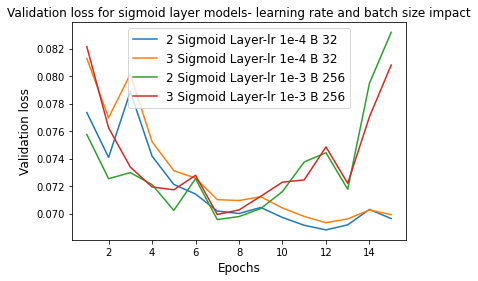

In [11]:
plt.plot(range(1,16),res_dls['val_loss'], label='2 Sigmoid Layer-lr 1e-4 B 32')
plt.plot(range(1,16),res_tls['val_loss'], label='3 Sigmoid Layer-lr 1e-4 B 32')
plt.plot(range(1,16),res_dls_b256['val_loss'], label='2 Sigmoid Layer-lr 1e-3 B 256')
plt.plot(range(1,16),res_tls_b256['val_loss'], label='3 Sigmoid Layer-lr 1e-3 B 256')

plt.title("Validation loss for sigmoid layer models- learning rate and batch size impact")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

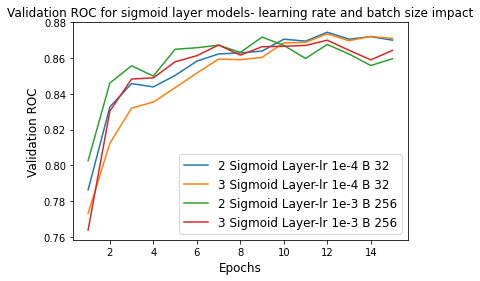

In [12]:
plt.plot(range(1,16),res_dls['val_roc'], label='2 Sigmoid Layer-lr 1e-4 B 32')
plt.plot(range(1,16),res_tls['val_roc'], label='3 Sigmoid Layer-lr 1e-4 B 32')
plt.plot(range(1,16),res_dls_b256['val_roc'], label='2 Sigmoid Layer-lr 1e-3 B 256')
plt.plot(range(1,16),res_tls_b256['val_roc'], label='3 Sigmoid Layer-lr 1e-3 B 256')

plt.title("Validation ROC for sigmoid layer models- learning rate and batch size impact")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

In [124]:
print("Maximum ROC 2 Sigmoid Layer-lr 1e-4 B 32: "+str(max(res_dls['val_roc']))+" at "+str(res_dls['val_roc'].index(max(res_dls['val_roc'])))+"Epochs")
print("Maximum ROC 3 Sigmoid Layer-lr 1e-4 B 32: "+str(max(res_tls['val_roc']))+" at "+str(res_tls['val_roc'].index(max(res_tls['val_roc'])))+"Epochs")
print("Maximum ROC 2 Sigmoid Layer-lr 1e-3 B 256: "+str(max(res_dls_b256['val_roc']))+" at "+str(res_dls_b256['val_roc'].index(max(res_dls_b256['val_roc'])))+"Epochs")
print("Maximum ROC 3 Sigmoid Layer-lr 1e-3 B 256: "+str(max(res_tls_b256['val_roc']))+" at "+str(res_tls_b256['val_roc'].index(max(res_tls_b256['val_roc'])))+"Epochs")

Maximum ROC 2 Sigmoid Layer-lr 1e-4 B 32: 0.8744790975814652 at 11Epochs
Maximum ROC 3 Sigmoid Layer-lr 1e-4 B 32: 0.8735671729230226 at 11Epochs
Maximum ROC 2 Sigmoid Layer-lr 1e-3 B 256: 0.8717612857585002 at 8Epochs
Maximum ROC 3 Sigmoid Layer-lr 1e-3 B 256: 0.8700203386832913 at 11Epochs


## Architecture testing

### Double Sigmoid Testing: L1:[1280,256] L2:[256,1] 

In [131]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [132]:
# Instantiate Model
d_model= DoubleLinearSigmoid(n1=256)
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [133]:
BaseCache_featureDS_DLS_HLR_B256_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DLS_HLR_B256_A256_training")


 epoch: 0, train loss: 0.111796, val loss: 0.080181, train acc: 0.9698, val acc: 0.9830, val roc:0.7642



 epoch: 1, train loss: 0.090802, val loss: 0.074744, train acc: 0.9791, val acc: 0.9831, val roc:0.8286



 epoch: 2, train loss: 0.080670, val loss: 0.072751, train acc: 0.9806, val acc: 0.9831, val roc:0.8466



 epoch: 3, train loss: 0.076195, val loss: 0.071861, train acc: 0.9807, val acc: 0.9830, val roc:0.8465



 epoch: 4, train loss: 0.074167, val loss: 0.071253, train acc: 0.9807, val acc: 0.9830, val roc:0.8577



 epoch: 5, train loss: 0.068157, val loss: 0.070702, train acc: 0.9823, val acc: 0.9828, val roc:0.8639



 epoch: 6, train loss: 0.070206, val loss: 0.069376, train acc: 0.9816, val acc: 0.9831, val roc:0.8661



 epoch: 7, train loss: 0.069104, val loss: 0.069665, train acc: 0.9809, val acc: 0.9831, val roc:0.8646



 epoch: 8, train loss: 0.068392, val loss: 0.070302, train acc: 0.9812, val acc: 0.9827, val roc:0.8669



 epoch: 9, train loss: 0.065289, val loss: 0.070505, train acc: 0.9813, val acc: 0.9827, val roc:0.8681



 epoch: 10, train loss: 0.060964, val loss: 0.071055, train acc: 0.9823, val acc: 0.9831, val roc:0.8666



 epoch: 11, train loss: 0.063920, val loss: 0.070261, train acc: 0.9818, val acc: 0.9828, val roc:0.8750



 epoch: 12, train loss: 0.062265, val loss: 0.070599, train acc: 0.9825, val acc: 0.9822, val roc:0.8688



 epoch: 13, train loss: 0.061708, val loss: 0.074162, train acc: 0.9813, val acc: 0.9817, val roc:0.8643



 epoch: 14, train loss: 0.059210, val loss: 0.075368, train acc: 0.9821, val acc: 0.9827, val roc:0.8685
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_A256_training.pth.tar saved.
Training Finished
Training and validation time: 155.51757192611694 seconds


### Double Sigmoid Testing: L1:[1280,128] L2:[128,1] 

In [134]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [135]:
# Instantiate Model
d_model= DoubleLinearSigmoid(n1=128)
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [136]:
BaseCache_featureDS_DLS_HLR_B256_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,checkpoint_name="BaseCache_featureDS_DLS_HLR_B256_A128_training")


 epoch: 0, train loss: 0.114089, val loss: 0.082729, train acc: 0.9803, val acc: 0.9830, val roc:0.7379



 epoch: 1, train loss: 0.095197, val loss: 0.077617, train acc: 0.9791, val acc: 0.9831, val roc:0.8001



 epoch: 2, train loss: 0.084347, val loss: 0.075712, train acc: 0.9805, val acc: 0.9831, val roc:0.8318



 epoch: 3, train loss: 0.079015, val loss: 0.073666, train acc: 0.9806, val acc: 0.9830, val roc:0.8376



 epoch: 4, train loss: 0.076297, val loss: 0.072161, train acc: 0.9807, val acc: 0.9830, val roc:0.8496



 epoch: 5, train loss: 0.070029, val loss: 0.070886, train acc: 0.9821, val acc: 0.9828, val roc:0.8579



 epoch: 6, train loss: 0.072255, val loss: 0.069882, train acc: 0.9814, val acc: 0.9830, val roc:0.8615



 epoch: 7, train loss: 0.071476, val loss: 0.071479, train acc: 0.9808, val acc: 0.9833, val roc:0.8612



 epoch: 8, train loss: 0.070160, val loss: 0.070683, train acc: 0.9811, val acc: 0.9830, val roc:0.8622



 epoch: 9, train loss: 0.068018, val loss: 0.069993, train acc: 0.9808, val acc: 0.9830, val roc:0.8662



 epoch: 10, train loss: 0.063905, val loss: 0.069562, train acc: 0.9822, val acc: 0.9830, val roc:0.8674



 epoch: 11, train loss: 0.066795, val loss: 0.068641, train acc: 0.9817, val acc: 0.9831, val roc:0.8758



 epoch: 12, train loss: 0.064924, val loss: 0.069795, train acc: 0.9819, val acc: 0.9830, val roc:0.8703



 epoch: 13, train loss: 0.065380, val loss: 0.070655, train acc: 0.9802, val acc: 0.9830, val roc:0.8709



 epoch: 14, train loss: 0.062381, val loss: 0.070430, train acc: 0.9813, val acc: 0.9827, val roc:0.8703
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_A128_training.pth.tar saved.
Training Finished
Training and validation time: 160.03426241874695 seconds


### Notes:
- Hidden layer for double sigmoid model with size 128 gives the best validation ROC. Double sigmoid model with 512 achieves comparable results with less epochs.

In [24]:
res_dls_b256_A256 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_A256_training.pth.tar')
res_dls_b256_A128 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_DLS_HLR_B256_A128_training.pth.tar')

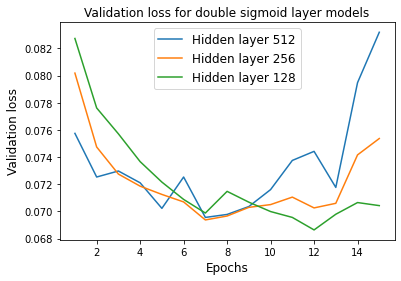

In [27]:

plt.plot(range(1,16),res_dls_b256['val_loss'], label='Hidden layer 512')
plt.plot(range(1,16),res_dls_b256_A256['val_loss'], label='Hidden layer 256')
plt.plot(range(1,16),res_dls_b256_A128['val_loss'], label='Hidden layer 128')

plt.title("Validation loss for double sigmoid layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

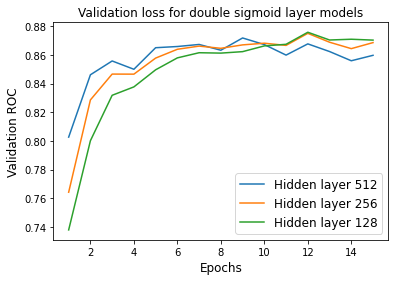

In [28]:
plt.plot(range(1,16),res_dls_b256['val_roc'], label='Hidden layer 512')
plt.plot(range(1,16),res_dls_b256_A256['val_roc'], label='Hidden layer 256')
plt.plot(range(1,16),res_dls_b256_A128['val_roc'], label='Hidden layer 128')

plt.title("Validation loss for double sigmoid layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

### Triple Sigmoid Testing - L1:[1280,256] L2:[256,256] L3: [256,1] 

In [141]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [142]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=256,n2=256)
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [143]:
BaseCache_featureDS_TLS_HLR_B256_A256x256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="BaseCache_featureDS_TLS_HLR_B256_A256x256_training")


 epoch: 0, train loss: 0.112619, val loss: 0.080728, train acc: 0.9803, val acc: 0.9830, val roc:0.7695



 epoch: 1, train loss: 0.090287, val loss: 0.076202, train acc: 0.9790, val acc: 0.9830, val roc:0.8289



 epoch: 2, train loss: 0.081281, val loss: 0.073450, train acc: 0.9805, val acc: 0.9830, val roc:0.8471



 epoch: 3, train loss: 0.077110, val loss: 0.071889, train acc: 0.9806, val acc: 0.9830, val roc:0.8487



 epoch: 4, train loss: 0.075381, val loss: 0.071970, train acc: 0.9803, val acc: 0.9830, val roc:0.8565



 epoch: 5, train loss: 0.069451, val loss: 0.071883, train acc: 0.9818, val acc: 0.9830, val roc:0.8615



 epoch: 6, train loss: 0.070481, val loss: 0.069876, train acc: 0.9810, val acc: 0.9830, val roc:0.8667



 epoch: 7, train loss: 0.069128, val loss: 0.070211, train acc: 0.9804, val acc: 0.9830, val roc:0.8624



 epoch: 8, train loss: 0.068103, val loss: 0.070814, train acc: 0.9811, val acc: 0.9830, val roc:0.8661



 epoch: 9, train loss: 0.064727, val loss: 0.071682, train acc: 0.9808, val acc: 0.9828, val roc:0.8680



 epoch: 10, train loss: 0.059659, val loss: 0.071843, train acc: 0.9819, val acc: 0.9828, val roc:0.8689



 epoch: 11, train loss: 0.061822, val loss: 0.072370, train acc: 0.9813, val acc: 0.9813, val roc:0.8733



 epoch: 12, train loss: 0.060408, val loss: 0.071196, train acc: 0.9820, val acc: 0.9822, val roc:0.8668



 epoch: 13, train loss: 0.058247, val loss: 0.075320, train acc: 0.9816, val acc: 0.9810, val roc:0.8619



 epoch: 14, train loss: 0.055048, val loss: 0.079393, train acc: 0.9825, val acc: 0.9828, val roc:0.8677
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A256x256_training.pth.tar saved.
Training Finished
Training and validation time: 152.8007357120514 seconds


### Triple Sigmoid Testing - L1:[1280,512] L2:[512,128] L3: [128,1] 

In [26]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [27]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=128)
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [28]:
BaseCache_featureDS_TLS_HLR_B256_A512x128_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="BaseCache_featureDS_TLS_HLR_B256_A512x128_training")


 epoch: 0, train loss: 0.109970, val loss: 0.086401, train acc: 0.9803, val acc: 0.9830, val roc:0.7473



 epoch: 1, train loss: 0.101213, val loss: 0.083514, train acc: 0.9790, val acc: 0.9830, val roc:0.7484



 epoch: 2, train loss: 0.089146, val loss: 0.077460, train acc: 0.9805, val acc: 0.9830, val roc:0.8184



 epoch: 3, train loss: 0.080609, val loss: 0.073745, train acc: 0.9806, val acc: 0.9830, val roc:0.8359



 epoch: 4, train loss: 0.077942, val loss: 0.072910, train acc: 0.9803, val acc: 0.9830, val roc:0.8483



 epoch: 5, train loss: 0.071574, val loss: 0.071803, train acc: 0.9818, val acc: 0.9830, val roc:0.8553



 epoch: 6, train loss: 0.072479, val loss: 0.070655, train acc: 0.9810, val acc: 0.9830, val roc:0.8614



 epoch: 7, train loss: 0.071318, val loss: 0.070977, train acc: 0.9803, val acc: 0.9830, val roc:0.8583



 epoch: 8, train loss: 0.069248, val loss: 0.071565, train acc: 0.9809, val acc: 0.9830, val roc:0.8606



 epoch: 9, train loss: 0.065994, val loss: 0.072830, train acc: 0.9805, val acc: 0.9828, val roc:0.8639



 epoch: 10, train loss: 0.060467, val loss: 0.072184, train acc: 0.9820, val acc: 0.9830, val roc:0.8652



 epoch: 11, train loss: 0.062144, val loss: 0.073432, train acc: 0.9812, val acc: 0.9816, val roc:0.8686



 epoch: 12, train loss: 0.060181, val loss: 0.072238, train acc: 0.9822, val acc: 0.9822, val roc:0.8619



 epoch: 13, train loss: 0.057612, val loss: 0.076620, train acc: 0.9817, val acc: 0.9813, val roc:0.8584



 epoch: 14, train loss: 0.054022, val loss: 0.079636, train acc: 0.9829, val acc: 0.9830, val roc:0.8644
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A512x128_training.pth.tar saved.
Training Finished
Training and validation time: 156.19447684288025 seconds


### Triple Sigmoid Testing - L1:[1280,512] L2:[512,512] L3: [512,1] 

In [147]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [148]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=512)
criterion=nn.BCEWithLogitsLoss() 
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [149]:
BaseCache_featureDS_TLS_HLR_B256_A512x256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="BaseCache_featureDS_TLS_HLR_B256_A512x512_training")


 epoch: 0, train loss: 0.097829, val loss: 0.076095, train acc: 0.9803, val acc: 0.9830, val roc:0.7984



 epoch: 1, train loss: 0.086405, val loss: 0.073510, train acc: 0.9790, val acc: 0.9830, val roc:0.8437



 epoch: 2, train loss: 0.079030, val loss: 0.076639, train acc: 0.9805, val acc: 0.9830, val roc:0.8568



 epoch: 3, train loss: 0.076564, val loss: 0.072343, train acc: 0.9806, val acc: 0.9830, val roc:0.8522



 epoch: 4, train loss: 0.073201, val loss: 0.070536, train acc: 0.9804, val acc: 0.9830, val roc:0.8627



 epoch: 5, train loss: 0.067955, val loss: 0.071780, train acc: 0.9821, val acc: 0.9828, val roc:0.8658



 epoch: 6, train loss: 0.068674, val loss: 0.069791, train acc: 0.9815, val acc: 0.9827, val roc:0.8688



 epoch: 7, train loss: 0.067360, val loss: 0.070131, train acc: 0.9808, val acc: 0.9830, val roc:0.8635



 epoch: 8, train loss: 0.067240, val loss: 0.070808, train acc: 0.9816, val acc: 0.9827, val roc:0.8698



 epoch: 9, train loss: 0.063639, val loss: 0.072016, train acc: 0.9814, val acc: 0.9817, val roc:0.8694



 epoch: 10, train loss: 0.057546, val loss: 0.073588, train acc: 0.9831, val acc: 0.9830, val roc:0.8664



 epoch: 11, train loss: 0.060080, val loss: 0.078301, train acc: 0.9818, val acc: 0.9789, val roc:0.8704



 epoch: 12, train loss: 0.058853, val loss: 0.074285, train acc: 0.9832, val acc: 0.9828, val roc:0.8652



 epoch: 13, train loss: 0.056187, val loss: 0.081638, train acc: 0.9821, val acc: 0.9769, val roc:0.8575



 epoch: 14, train loss: 0.052316, val loss: 0.080097, train acc: 0.9836, val acc: 0.9827, val roc:0.8618
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A512x512_training.pth.tar saved.
Training Finished
Training and validation time: 159.18016123771667 seconds


In [29]:
res_tls_b256_A256x256 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A256x256_training.pth.tar')
res_tls_b256_A512x128 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A512x128_training.pth.tar')
res_tls_b256_A512x512 = load_results('./TrainedEffNetcheckpoint_BaseCache_featureDS_TLS_HLR_B256_A512x512_training.pth.tar')


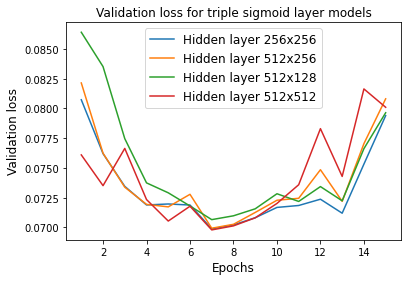

In [30]:
plt.plot(range(1,16),res_tls_b256_A256x256['val_loss'], label='Hidden layer 256x256')
plt.plot(range(1,16),res_tls_b256['val_loss'], label='Hidden layer 512x256')
plt.plot(range(1,16),res_tls_b256_A512x128['val_loss'], label='Hidden layer 512x128')
plt.plot(range(1,16),res_tls_b256_A512x512['val_loss'], label='Hidden layer 512x512')

plt.title("Validation loss for triple sigmoid layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

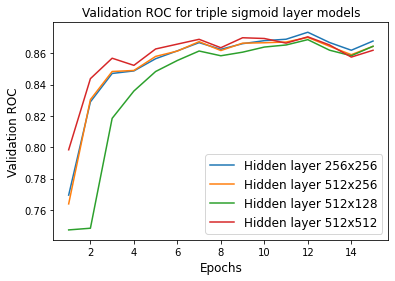

In [31]:
plt.plot(range(1,16),res_tls_b256_A256x256['val_roc'], label='Hidden layer 256x256')
plt.plot(range(1,16),res_tls_b256['val_roc'], label='Hidden layer 512x256')
plt.plot(range(1,16),res_tls_b256_A512x128['val_roc'], label='Hidden layer 512x128')
plt.plot(range(1,16),res_tls_b256_A512x512['val_roc'], label='Hidden layer 512x512')

plt.title("Validation ROC for triple sigmoid layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

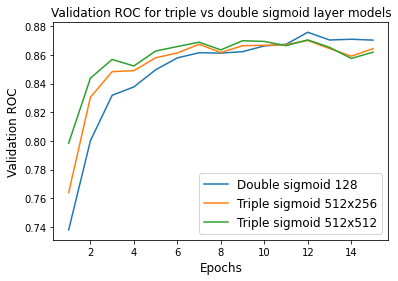

In [19]:
#plt.plot(range(1,11),res_tls_b256_A256x256['val_roc'], label='Hiden layer 256x256')
#plt.plot(range(1,11),res_tls_b256['val_roc'], label='Hiden layer 512x128')
plt.plot(range(1,16),res_dls_b256_A128['val_roc'], label='Double sigmoid 128')
plt.plot(range(1,16),res_tls_b256['val_roc'], label='Triple sigmoid 512x256')
plt.plot(range(1,16),res_tls_b256_A512x512['val_roc'], label='Triple sigmoid 512x512')

plt.title("Validation ROC for triple vs double sigmoid layer models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

In [20]:
print("Comparing maximum ROC score over 15 Epochs") 

print("Maximum ROC Double sigmoid 128: "+str(max(res_dls_b256_A128['val_roc']))+" at "+str(res_dls_b256_A128['val_roc'].index(max(res_dls_b256_A128['val_roc'])))+"Epochs")
print("Maximum ROC Double sigmoid 512: "+str(max(res_dls_b256['val_roc']))+" at "+str(res_dls_b256['val_roc'].index(max(res_dls_b256['val_roc'])))+"Epochs")

print("Maximum ROC Triple sigmoid 512x256: "+str(max(res_tls_b256['val_roc']))+" at "+str(res_tls_b256['val_roc'].index(max(res_tls_b256['val_roc'])))+"Epochs")
print("Maximum ROC Triple sigmoid 512x512: "+str(max(res_tls_b256_A512x512['val_roc']))+" at "+str(res_tls_b256_A512x512['val_roc'].index(max(res_tls_b256_A512x512['val_roc'])))+"Epochs")

Comparing maximum ROC score over 15 Epochs
Maximum ROC Double sigmoid 128: 0.8757530286952293 at 11Epochs
Maximum ROC Double sigmoid 512: 0.8717612857585002 at 8Epochs
Maximum ROC Triple sigmoid 512x256: 0.8700203386832913 at 11Epochs
Maximum ROC Triple sigmoid 512x512: 0.8704210328513949 at 11Epochs


In [21]:
print("Comparing maximum ROC score over 7 Epochs") 

print("Maximum ROC Double sigmoid 128: "+str(max(res_dls_b256_A128['val_roc'][:7]))+" at "+str(res_dls_b256_A128['val_roc'][:7].index(max(res_dls_b256_A128['val_roc'][:7])))+"Epochs")
print("Maximum ROC Double sigmoid 512: "+str(max(res_dls_b256['val_roc'][:7]))+" at "+str(res_dls_b256['val_roc'][:7].index(max(res_dls_b256['val_roc'][:7])))+"Epochs")

print("Maximum ROC Triple sigmoid 512x256: "+str(max(res_tls_b256['val_roc'][:7]))+" at "+str(res_tls_b256['val_roc'][:7].index(max(res_tls_b256['val_roc'][:7])))+"Epochs")
print("Maximum ROC Triple sigmoid 512x512: "+str(max(res_tls_b256_A512x512['val_roc'][:7]))+" at "+str(res_tls_b256_A512x512['val_roc'][:7].index(max(res_tls_b256_A512x512['val_roc'][:7])))+"Epochs")

Comparing maximum ROC score over 7 Epochs
Maximum ROC Double sigmoid 128: 0.8614703541583764 at 6Epochs
Maximum ROC Double sigmoid 512: 0.867234823362957 at 6Epochs
Maximum ROC Triple sigmoid 512x256: 0.8673384511650528 at 6Epochs
Maximum ROC Triple sigmoid 512x512: 0.8688320732192598 at 6Epochs


### Conclusion:

- The model with two sigmoid layers and 128 neuron hidden layer gives the best ROC scores over 15 Epochs and has more stable validation loss that does not overfit the training data.

- A smaller number of epochs isrequired for two sigmoid layers and 512 neurons and triple layer models with 512x256 neurons to acheive similar ROC. The models converge fast but can overfit the training data if they are trained for more than 7 Epochs.

- In the next sections we will compare Double sigmoid 128 with Triple sigmoid 512x256 to analyse the impact of different loss function, data augmentation and oversampling.

## Loss function: Focal Loss vs Binary Cross-entropy Loss (BCEWithLogitsLoss)

### Double Sigmoid Testing: L1:[1280,128] L2:[128,1] - Focal Loss

In [97]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [98]:
# Instantiate Model
d_model= DoubleLinearSigmoid(n1=128)
criterion=FocalLoss()
optimizer= optim.Adam(d_model.parameters(), lr=learning_rate)

In [100]:
FeatureDS_FocalLoss_TLS_HLR_B256_A512x256_training= train_val_clip(d_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLoss_DLS_HLR_B256_A512x256_training")


 epoch: 0, train loss: 0.028653, val loss: 0.022147, train acc: 0.9803, val acc: 0.9827, val roc:0.8070



 epoch: 1, train loss: 0.024685, val loss: 0.021419, train acc: 0.9791, val acc: 0.9830, val roc:0.8434



 epoch: 2, train loss: 0.022540, val loss: 0.021126, train acc: 0.9803, val acc: 0.9834, val roc:0.8540



 epoch: 3, train loss: 0.021533, val loss: 0.020936, train acc: 0.9808, val acc: 0.9830, val roc:0.8473



 epoch: 4, train loss: 0.020839, val loss: 0.020416, train acc: 0.9808, val acc: 0.9831, val roc:0.8624



 epoch: 5, train loss: 0.019353, val loss: 0.021318, train acc: 0.9824, val acc: 0.9828, val roc:0.8624



 epoch: 6, train loss: 0.019701, val loss: 0.020143, train acc: 0.9815, val acc: 0.9825, val roc:0.8661



 epoch: 7, train loss: 0.019316, val loss: 0.020195, train acc: 0.9809, val acc: 0.9831, val roc:0.8637



 epoch: 8, train loss: 0.019462, val loss: 0.020228, train acc: 0.9814, val acc: 0.9828, val roc:0.8703



 epoch: 9, train loss: 0.018344, val loss: 0.020454, train acc: 0.9812, val acc: 0.9819, val roc:0.8672



 epoch: 10, train loss: 0.017072, val loss: 0.020966, train acc: 0.9821, val acc: 0.9831, val roc:0.8637



 epoch: 11, train loss: 0.017746, val loss: 0.020283, train acc: 0.9812, val acc: 0.9822, val roc:0.8729



 epoch: 12, train loss: 0.017657, val loss: 0.020243, train acc: 0.9816, val acc: 0.9822, val roc:0.8685



 epoch: 13, train loss: 0.017251, val loss: 0.021850, train acc: 0.9809, val acc: 0.9801, val roc:0.8613



 epoch: 14, train loss: 0.016610, val loss: 0.023269, train acc: 0.9815, val acc: 0.9828, val roc:0.8651
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLoss_DLS_HLR_B256_A512x256_training.pth.tar saved.
Training Finished
Training and validation time: 93.97814345359802 seconds


In [20]:
res_dls_flg2 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLoss_DLS_HLR_B256_A512x256_training.pth.tar')


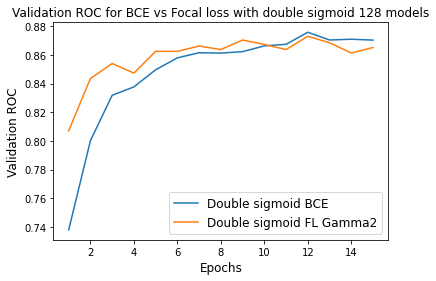

In [21]:
#plt.plot(range(1,11),res_tls_b256_A256x256['val_roc'], label='Hiden layer 256x256')
#plt.plot(range(1,11),res_tls_b256['val_roc'], label='Hiden layer 512x128')
plt.plot(range(1,16),res_dls_b256_A128['val_roc'], label='Double sigmoid BCE')
plt.plot(range(1,16),res_dls_flg2['val_roc'], label='Double sigmoid FL Gamma2')

plt.title("Validation ROC for BCE vs Focal loss with double sigmoid 128 models")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

In [24]:
print("Comparing maximum ROC score over 15 Epochs") 

print("Maximum ROC Double sigmoid BCE: "+str(max(res_dls_b256_A128['val_roc']))+" at "+str(res_dls_b256_A128['val_roc'].index(max(res_dls_b256_A128['val_roc'])))+"Epochs")
print("Maximum ROC Double sigmoid FL: "+str(max(res_dls_flg2['val_roc']))+" at "+str(res_dls_flg2['val_roc'].index(max(res_dls_flg2['val_roc'])))+"Epochs")


Comparing maximum ROC score over 15 Epochs
Maximum ROC Double sigmoid BCE: 0.8757530286952293 at 11Epochs
Maximum ROC Double sigmoid FL: 0.8729108635097493 at 11Epochs


In [25]:
print("Comparing maximum ROC score over 7 Epochs") 

print("Maximum ROC Double sigmoid BCE: "+str(max(res_dls_b256_A128['val_roc'][:7]))+" at "+str(res_dls_b256_A128['val_roc'][:7].index(max(res_dls_b256_A128['val_roc'][:7])))+"Epochs")
print("Maximum ROC Double sigmoid FL: "+str(max(res_dls_flg2['val_roc'][:7]))+" at "+str(res_dls_flg2['val_roc'][:7].index(max(res_dls_flg2['val_roc'][:7])))+"Epochs")

Comparing maximum ROC score over 7 Epochs
Maximum ROC Double sigmoid BCE: 0.8614703541583764 at 6Epochs
Maximum ROC Double sigmoid FL: 0.8661004443560154 at 6Epochs


### Conclusion:
- With the focal loss, the double sigmoid model achieves better ROC scores at early Epochs and the overall ROC for 15 Epoch is slightly lower compared to Binary cross entropy loss  

### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss

In [40]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [41]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss()
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [42]:
FeatureDS_FocalLoss_TLS_HLR_B256_A512x256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLoss_TLS_HLR_B256_A512x256_training")


 epoch: 0, train loss: 0.029534, val loss: 0.022313, train acc: 0.9698, val acc: 0.9830, val roc:0.7982



 epoch: 1, train loss: 0.024797, val loss: 0.021578, train acc: 0.9790, val acc: 0.9830, val roc:0.8433



 epoch: 2, train loss: 0.022561, val loss: 0.023523, train acc: 0.9805, val acc: 0.9830, val roc:0.8573



 epoch: 3, train loss: 0.022184, val loss: 0.021216, train acc: 0.9806, val acc: 0.9828, val roc:0.8517



 epoch: 4, train loss: 0.020760, val loss: 0.020392, train acc: 0.9805, val acc: 0.9830, val roc:0.8614



 epoch: 5, train loss: 0.019308, val loss: 0.020591, train acc: 0.9822, val acc: 0.9827, val roc:0.8633



 epoch: 6, train loss: 0.019400, val loss: 0.020273, train acc: 0.9816, val acc: 0.9825, val roc:0.8651



 epoch: 7, train loss: 0.018979, val loss: 0.020332, train acc: 0.9810, val acc: 0.9831, val roc:0.8608



 epoch: 8, train loss: 0.018817, val loss: 0.020560, train acc: 0.9815, val acc: 0.9821, val roc:0.8682



 epoch: 9, train loss: 0.017977, val loss: 0.020911, train acc: 0.9812, val acc: 0.9816, val roc:0.8659



 epoch: 10, train loss: 0.015921, val loss: 0.022162, train acc: 0.9834, val acc: 0.9830, val roc:0.8629



 epoch: 11, train loss: 0.016607, val loss: 0.021115, train acc: 0.9826, val acc: 0.9816, val roc:0.8666



 epoch: 12, train loss: 0.016473, val loss: 0.022447, train acc: 0.9832, val acc: 0.9825, val roc:0.8612



 epoch: 13, train loss: 0.015487, val loss: 0.023513, train acc: 0.9821, val acc: 0.9761, val roc:0.8552



 epoch: 14, train loss: 0.014005, val loss: 0.023467, train acc: 0.9835, val acc: 0.9810, val roc:0.8503
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLoss_TLS_HLR_B256_A512x256_training.pth.tar saved.
Training Finished
Training and validation time: 157.47913694381714 seconds


### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3
##### Note: Default gamma is 2 for focal loss

In [43]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [44]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3)
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [45]:
FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_training")


 epoch: 0, train loss: 0.016135, val loss: 0.012186, train acc: 0.9698, val acc: 0.9830, val roc:0.7987



 epoch: 1, train loss: 0.013416, val loss: 0.011958, train acc: 0.9790, val acc: 0.9830, val roc:0.8433



 epoch: 2, train loss: 0.012163, val loss: 0.013393, train acc: 0.9804, val acc: 0.9828, val roc:0.8578



 epoch: 3, train loss: 0.012008, val loss: 0.011937, train acc: 0.9806, val acc: 0.9827, val roc:0.8521



 epoch: 4, train loss: 0.011123, val loss: 0.011068, train acc: 0.9805, val acc: 0.9828, val roc:0.8597



 epoch: 5, train loss: 0.010408, val loss: 0.011179, train acc: 0.9823, val acc: 0.9827, val roc:0.8613



 epoch: 6, train loss: 0.010355, val loss: 0.011049, train acc: 0.9817, val acc: 0.9822, val roc:0.8630



 epoch: 7, train loss: 0.010190, val loss: 0.011133, train acc: 0.9809, val acc: 0.9830, val roc:0.8603



 epoch: 8, train loss: 0.010138, val loss: 0.011285, train acc: 0.9814, val acc: 0.9824, val roc:0.8688



 epoch: 9, train loss: 0.009745, val loss: 0.011430, train acc: 0.9811, val acc: 0.9813, val roc:0.8649



 epoch: 10, train loss: 0.008556, val loss: 0.012529, train acc: 0.9831, val acc: 0.9827, val roc:0.8611



 epoch: 11, train loss: 0.008954, val loss: 0.011696, train acc: 0.9827, val acc: 0.9825, val roc:0.8624



 epoch: 12, train loss: 0.008978, val loss: 0.012389, train acc: 0.9829, val acc: 0.9825, val roc:0.8607



 epoch: 13, train loss: 0.008294, val loss: 0.012790, train acc: 0.9815, val acc: 0.9767, val roc:0.8548



 epoch: 14, train loss: 0.007502, val loss: 0.013259, train acc: 0.9827, val acc: 0.9814, val roc:0.8468
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_training.pth.tar saved.
Training Finished
Training and validation time: 158.6134991645813 seconds


### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=4

In [46]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [47]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=4)
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [48]:
FeatureDS_FocalLossG4_TLS_HLR_B256_A512x256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG4_TLS_HLR_B256_A512x256_training")


 epoch: 0, train loss: 0.008897, val loss: 0.006555, train acc: 0.9698, val acc: 0.9830, val roc:0.7941



 epoch: 1, train loss: 0.007139, val loss: 0.006432, train acc: 0.9790, val acc: 0.9830, val roc:0.8413



 epoch: 2, train loss: 0.006472, val loss: 0.007112, train acc: 0.9804, val acc: 0.9825, val roc:0.8565



 epoch: 3, train loss: 0.006393, val loss: 0.006381, train acc: 0.9806, val acc: 0.9827, val roc:0.8511



 epoch: 4, train loss: 0.005912, val loss: 0.005889, train acc: 0.9805, val acc: 0.9828, val roc:0.8579



 epoch: 5, train loss: 0.005566, val loss: 0.005951, train acc: 0.9823, val acc: 0.9827, val roc:0.8598



 epoch: 6, train loss: 0.005495, val loss: 0.005875, train acc: 0.9817, val acc: 0.9821, val roc:0.8624



 epoch: 7, train loss: 0.005443, val loss: 0.006003, train acc: 0.9808, val acc: 0.9831, val roc:0.8607



 epoch: 8, train loss: 0.005423, val loss: 0.006047, train acc: 0.9813, val acc: 0.9824, val roc:0.8687



 epoch: 9, train loss: 0.005264, val loss: 0.006056, train acc: 0.9808, val acc: 0.9811, val roc:0.8647



 epoch: 10, train loss: 0.004613, val loss: 0.006809, train acc: 0.9827, val acc: 0.9828, val roc:0.8608



 epoch: 11, train loss: 0.004816, val loss: 0.006258, train acc: 0.9820, val acc: 0.9825, val roc:0.8624



 epoch: 12, train loss: 0.004895, val loss: 0.006574, train acc: 0.9825, val acc: 0.9827, val roc:0.8619



 epoch: 13, train loss: 0.004485, val loss: 0.006717, train acc: 0.9808, val acc: 0.9773, val roc:0.8559



 epoch: 14, train loss: 0.004100, val loss: 0.007224, train acc: 0.9822, val acc: 0.9821, val roc:0.8468
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG4_TLS_HLR_B256_A512x256_training.pth.tar saved.
Training Finished
Training and validation time: 161.47617840766907 seconds


In [22]:
res_tls_flg2 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLoss_TLS_HLR_B256_A512x256_training.pth.tar')
res_tls_flg3 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_training.pth.tar')
res_tls_flg4 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG4_TLS_HLR_B256_A512x256_training.pth.tar')


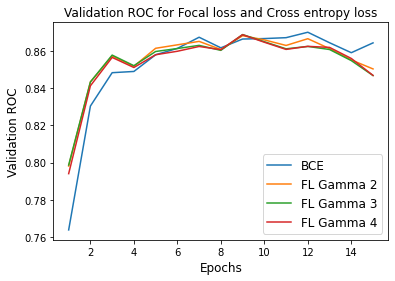

In [23]:

plt.plot(range(1,16),res_tls_b256['val_roc'], label='BCE')
plt.plot(range(1,16),res_tls_flg2['val_roc'], label='FL Gamma 2')
plt.plot(range(1,16),res_tls_flg3['val_roc'], label='FL Gamma 3')
plt.plot(range(1,16),res_tls_flg4['val_roc'], label='FL Gamma 4')

plt.title("Validation ROC for Focal loss and Cross entropy loss")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

In [29]:
print("Comparing maximum ROC score over 15 Epochs") 

print("Maximum ROC BCE: "+str(max(res_tls_b256['val_roc']))+" at "+str(res_tls_b256['val_roc'].index(max(res_tls_b256['val_roc'])))+"Epochs")
print("Maximum ROC FL Gamma 2: "+str(max(res_tls_flg2['val_roc']))+" at "+str(res_tls_flg2['val_roc'].index(max(res_tls_flg2['val_roc'])))+"Epochs")
print("Maximum ROC FL Gamma 3: "+str(max(res_tls_flg3['val_roc']))+" at "+str(res_tls_flg3['val_roc'].index(max(res_tls_flg3['val_roc'])))+"Epochs")
print("Maximum ROC FL Gamma 4: "+str(max(res_tls_flg4['val_roc']))+" at "+str(res_tls_flg4['val_roc'].index(max(res_tls_flg4['val_roc'])))+"Epochs")

Comparing maximum ROC score over 15 Epochs
Maximum ROC BCE: 0.8700203386832913 at 11Epochs
Maximum ROC FL Gamma 2: 0.8681716186939028 at 8Epochs
Maximum ROC FL Gamma 3: 0.8687809501702258 at 8Epochs
Maximum ROC FL Gamma 4: 0.8687132466728567 at 8Epochs


In [30]:
print("Comparing maximum ROC score over 7 Epochs") 

print("Maximum ROC BCE: "+str(max(res_tls_b256['val_roc'][:7]))+" at "+str(res_tls_b256['val_roc'][:7].index(max(res_tls_b256['val_roc'][:7])))+"Epochs")
print("Maximum ROC FL Gamma 2: "+str(max(res_tls_flg2['val_roc'][:7]))+" at "+str(res_tls_flg2['val_roc'][:7].index(max(res_tls_flg2['val_roc'][:7])))+"Epochs")
print("Maximum ROC FL Gamma 3: "+str(max(res_tls_flg3['val_roc'][:7]))+" at "+str(res_tls_flg3['val_roc'][:7].index(max(res_tls_flg3['val_roc'][:7])))+"Epochs")
print("Maximum ROC FL Gamma 4: "+str(max(res_tls_flg4['val_roc'][:7]))+" at "+str(res_tls_flg4['val_roc'][:7].index(max(res_tls_flg4['val_roc'][:7])))+"Epochs")

Comparing maximum ROC score over 7 Epochs
Maximum ROC BCE: 0.8673384511650528 at 6Epochs
Maximum ROC FL Gamma 2: 0.8651125259760357 at 6Epochs
Maximum ROC FL Gamma 3: 0.862976411548835 at 6Epochs
Maximum ROC FL Gamma 4: 0.8623753702966795 at 6Epochs


## Impact of Data Augmentation and Oversampling

### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3
### Oversampling with 20% and no data Augmentation 

In [58]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [59]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3)
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [60]:
FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_OS20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_OS20_training")


 epoch: 0, train loss: 0.047320, val loss: 0.019396, train acc: 0.8404, val acc: 0.9646, val roc:0.8578



 epoch: 1, train loss: 0.038843, val loss: 0.018597, train acc: 0.8622, val acc: 0.9609, val roc:0.8596



 epoch: 2, train loss: 0.033743, val loss: 0.013583, train acc: 0.8807, val acc: 0.9716, val roc:0.8702



 epoch: 3, train loss: 0.029955, val loss: 0.028235, train acc: 0.8934, val acc: 0.9087, val roc:0.8530



 epoch: 4, train loss: 0.026821, val loss: 0.015025, train acc: 0.9071, val acc: 0.9636, val roc:0.8603



 epoch: 5, train loss: 0.024266, val loss: 0.021131, train acc: 0.9163, val acc: 0.9434, val roc:0.8402



 epoch: 6, train loss: 0.022320, val loss: 0.016727, train acc: 0.9228, val acc: 0.9636, val roc:0.8335



 epoch: 7, train loss: 0.019803, val loss: 0.020968, train acc: 0.9345, val acc: 0.9472, val roc:0.8368



 epoch: 8, train loss: 0.017394, val loss: 0.023110, train acc: 0.9437, val acc: 0.9436, val roc:0.8447



 epoch: 9, train loss: 0.014692, val loss: 0.020989, train acc: 0.9565, val acc: 0.9633, val roc:0.8400



 epoch: 10, train loss: 0.013101, val loss: 0.031126, train acc: 0.9603, val acc: 0.9259, val roc:0.8288



 epoch: 11, train loss: 0.010958, val loss: 0.023615, train acc: 0.9696, val acc: 0.9713, val roc:0.8384



 epoch: 12, train loss: 0.008704, val loss: 0.028415, train acc: 0.9775, val acc: 0.9518, val roc:0.8319



 epoch: 13, train loss: 0.006890, val loss: 0.028896, train acc: 0.9853, val acc: 0.9568, val roc:0.8305



 epoch: 14, train loss: 0.006180, val loss: 0.030455, train acc: 0.9856, val acc: 0.9661, val roc:0.8348
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_OS20_training.pth.tar saved.
Training Finished
Training and validation time: 164.43391847610474 seconds


### Oversampling with 20% and no data Augmentation- Batch size 512

In [61]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [62]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3)
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [63]:
FeatureDS_FocalLossG3_TLS_HLR_B512_A512x256_OS20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3_TLS_HLR_B512_A512x256_OS20_training")


 epoch: 0, train loss: 0.053582, val loss: 0.028921, train acc: 0.8258, val acc: 0.9357, val roc:0.8165



 epoch: 1, train loss: 0.043410, val loss: 0.027856, train acc: 0.8493, val acc: 0.9326, val roc:0.8566



 epoch: 2, train loss: 0.038610, val loss: 0.017829, train acc: 0.8612, val acc: 0.9623, val roc:0.8646



 epoch: 3, train loss: 0.035815, val loss: 0.019598, train acc: 0.8733, val acc: 0.9568, val roc:0.8614



 epoch: 4, train loss: 0.032968, val loss: 0.018433, train acc: 0.8820, val acc: 0.9551, val roc:0.8621



 epoch: 5, train loss: 0.029792, val loss: 0.022618, train acc: 0.8927, val acc: 0.9367, val roc:0.8489



 epoch: 6, train loss: 0.028342, val loss: 0.020926, train acc: 0.9011, val acc: 0.9428, val roc:0.8490



 epoch: 7, train loss: 0.026582, val loss: 0.021698, train acc: 0.9047, val acc: 0.9384, val roc:0.8425



 epoch: 8, train loss: 0.025022, val loss: 0.019757, train acc: 0.9112, val acc: 0.9468, val roc:0.8413



 epoch: 9, train loss: 0.022914, val loss: 0.017164, train acc: 0.9204, val acc: 0.9566, val roc:0.8444



 epoch: 10, train loss: 0.021361, val loss: 0.018215, train acc: 0.9266, val acc: 0.9542, val roc:0.8369



 epoch: 11, train loss: 0.019811, val loss: 0.016431, train acc: 0.9334, val acc: 0.9678, val roc:0.8438



 epoch: 12, train loss: 0.018547, val loss: 0.027954, train acc: 0.9393, val acc: 0.9232, val roc:0.8294



 epoch: 13, train loss: 0.017340, val loss: 0.018838, train acc: 0.9461, val acc: 0.9591, val roc:0.8278



 epoch: 14, train loss: 0.015872, val loss: 0.018713, train acc: 0.9487, val acc: 0.9728, val roc:0.8399
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B512_A512x256_OS20_training.pth.tar saved.
Training Finished
Training and validation time: 151.02697372436523 seconds


In [24]:
res_tls_flg3_os20_b256 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_OS20_training.pth.tar')
res_tls_flg3_os20_b512 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B512_A512x256_OS20_training.pth.tar')


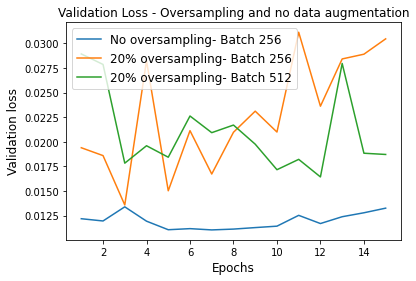

In [26]:
plt.plot(range(1,16),res_tls_flg3['val_loss'], label='No oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b256['val_loss'], label='20% oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b512['val_loss'], label='20% oversampling- Batch 512')

plt.title("Validation Loss - Oversampling and no data augmentation")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation loss", fontsize=12)
plt.show()

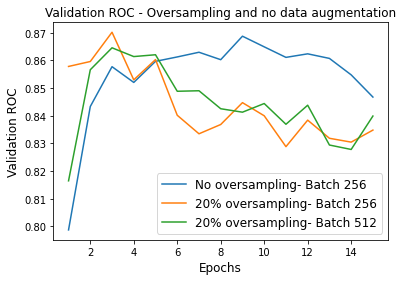

In [27]:
plt.plot(range(1,16),res_tls_flg3['val_roc'], label='No oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b256['val_roc'], label='20% oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b512['val_roc'], label='20% oversampling- Batch 512')

plt.title("Validation ROC - Oversampling and no data augmentation")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

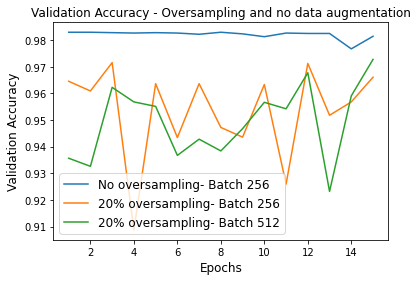

In [28]:
plt.plot(range(1,16),res_tls_flg3['val_acc'], label='No oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b256['val_acc'], label='20% oversampling- Batch 256')
plt.plot(range(1,16),res_tls_flg3_os20_b512['val_acc'], label='20% oversampling- Batch 512')

plt.title("Validation Accuracy - Oversampling and no data augmentation")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.show()

### Conclusion:

- Introducing ovesampling of 20% allows the model to achieve maximum ROC score for a small number of Epochs, however this reduces the accuracy of the model. This can be explained by the fact that introducing oversampling we change the loss function of the model,therefore the model fits data in minority class and reduces the fit quality the majority class. In the next step we will test adjusting the weights of the focal loss function.

### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3 Alpha=(0.5/2,0.5)

In [64]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

#### We add weights to the loss function to reduce the impact of oversampling on the weights

In [66]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/2,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [67]:
FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_training")


 epoch: 0, train loss: 0.037790, val loss: 0.018426, train acc: 0.8242, val acc: 0.9769, val roc:0.7971



 epoch: 1, train loss: 0.029964, val loss: 0.016306, train acc: 0.8403, val acc: 0.9729, val roc:0.8502



 epoch: 2, train loss: 0.026792, val loss: 0.010525, train acc: 0.8505, val acc: 0.9793, val roc:0.8600



 epoch: 3, train loss: 0.025334, val loss: 0.010459, train acc: 0.8596, val acc: 0.9790, val roc:0.8627



 epoch: 4, train loss: 0.024148, val loss: 0.016769, train acc: 0.8647, val acc: 0.9598, val roc:0.8623



 epoch: 5, train loss: 0.021877, val loss: 0.013380, train acc: 0.8747, val acc: 0.9662, val roc:0.8662



 epoch: 6, train loss: 0.020146, val loss: 0.014336, train acc: 0.8816, val acc: 0.9621, val roc:0.8519



 epoch: 7, train loss: 0.019610, val loss: 0.015645, train acc: 0.8823, val acc: 0.9544, val roc:0.8487



 epoch: 8, train loss: 0.018386, val loss: 0.011359, train acc: 0.8889, val acc: 0.9685, val roc:0.8464



 epoch: 9, train loss: 0.017017, val loss: 0.011016, train acc: 0.9030, val acc: 0.9671, val roc:0.8485



 epoch: 10, train loss: 0.016313, val loss: 0.010507, train acc: 0.9046, val acc: 0.9705, val roc:0.8447



 epoch: 11, train loss: 0.015055, val loss: 0.009806, train acc: 0.9129, val acc: 0.9729, val roc:0.8479



 epoch: 12, train loss: 0.014183, val loss: 0.017642, train acc: 0.9182, val acc: 0.9430, val roc:0.8326



 epoch: 13, train loss: 0.013363, val loss: 0.011455, train acc: 0.9264, val acc: 0.9665, val roc:0.8307



 epoch: 14, train loss: 0.012434, val loss: 0.010194, train acc: 0.9279, val acc: 0.9764, val roc:0.8429
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_training.pth.tar saved.
Training Finished
Training and validation time: 145.44340705871582 seconds


In [29]:
res_tls_flg3_os20_b512_W = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_training.pth.tar')

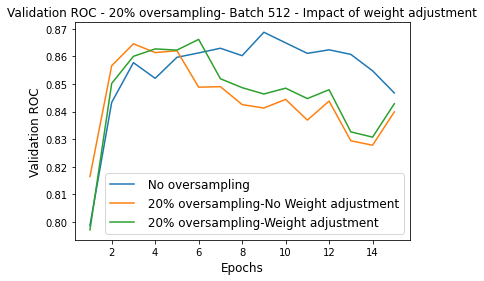

In [30]:
plt.plot(range(1,16),res_tls_flg3['val_roc'], label=' No oversampling')
plt.plot(range(1,16),res_tls_flg3_os20_b512['val_roc'], label=' 20% oversampling-No Weight adjustment')
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_roc'], label=' 20% oversampling-Weight adjustment')

plt.title("Validation ROC - 20% oversampling- Batch 512 - Impact of weight adjustment")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

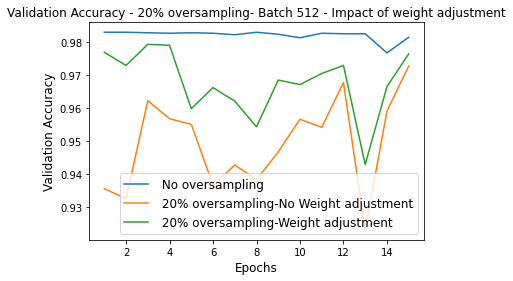

In [31]:
plt.plot(range(1,16),res_tls_flg3['val_acc'], label=' No oversampling')
plt.plot(range(1,16),res_tls_flg3_os20_b512['val_acc'], label=' 20% oversampling-No Weight adjustment')
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_acc'], label=' 20% oversampling-Weight adjustment')

plt.title("Validation Accuracy - 20% oversampling- Batch 512 - Impact of weight adjustment")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.show()

### Conclusion:
- Adjusting the weights of the loss function can improve the accuracy of training the model with oversampling, the weight adjustment in the loss function does not reduce the maximum ROC score achieved by the model.
- This means that oversampling with weight adjustment on the loss function can lead to better results for the minorty class without impacting model performance for majority class

##  Data Augmentation 

### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3 Alpha=(0.5/2,0.5) - Transform Prob 20%

In [68]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.2,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [69]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/2,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [70]:
FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_TP20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_TP20_training")


 epoch: 0, train loss: 0.037963, val loss: 0.018553, train acc: 0.8242, val acc: 0.9769, val roc:0.7988



 epoch: 1, train loss: 0.029740, val loss: 0.013267, train acc: 0.8433, val acc: 0.9792, val roc:0.8477



 epoch: 2, train loss: 0.028102, val loss: 0.015241, train acc: 0.8467, val acc: 0.9752, val roc:0.8632



 epoch: 3, train loss: 0.026340, val loss: 0.015720, train acc: 0.8549, val acc: 0.9705, val roc:0.8612



 epoch: 4, train loss: 0.024814, val loss: 0.011964, train acc: 0.8605, val acc: 0.9735, val roc:0.8703



 epoch: 5, train loss: 0.023209, val loss: 0.013800, train acc: 0.8671, val acc: 0.9667, val roc:0.8710



 epoch: 6, train loss: 0.021922, val loss: 0.011361, train acc: 0.8782, val acc: 0.9734, val roc:0.8627



 epoch: 7, train loss: 0.021179, val loss: 0.012548, train acc: 0.8810, val acc: 0.9670, val roc:0.8656



 epoch: 8, train loss: 0.020205, val loss: 0.017485, train acc: 0.8882, val acc: 0.9518, val roc:0.8631



 epoch: 9, train loss: 0.020064, val loss: 0.017306, train acc: 0.8901, val acc: 0.9503, val roc:0.8528



 epoch: 10, train loss: 0.019450, val loss: 0.011750, train acc: 0.8924, val acc: 0.9671, val roc:0.8555



 epoch: 11, train loss: 0.018495, val loss: 0.011998, train acc: 0.8985, val acc: 0.9658, val roc:0.8509



 epoch: 12, train loss: 0.017575, val loss: 0.009281, train acc: 0.9031, val acc: 0.9738, val roc:0.8572



 epoch: 13, train loss: 0.017224, val loss: 0.011090, train acc: 0.9068, val acc: 0.9700, val roc:0.8498



 epoch: 14, train loss: 0.016713, val loss: 0.010906, train acc: 0.9103, val acc: 0.9688, val roc:0.8441
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar saved.
Training Finished
Training and validation time: 297.56803941726685 seconds


### Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3 Alpha=(0.5/4,0.5) - Transform Prob 20%

In [71]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.2,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [72]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/4,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [73]:
FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training")


 epoch: 0, train loss: 0.026344, val loss: 0.008708, train acc: 0.8237, val acc: 0.9830, val roc:0.7912



 epoch: 1, train loss: 0.019964, val loss: 0.009235, train acc: 0.8359, val acc: 0.9828, val roc:0.8375



 epoch: 2, train loss: 0.018920, val loss: 0.009916, train acc: 0.8343, val acc: 0.9825, val roc:0.8563



 epoch: 3, train loss: 0.017931, val loss: 0.009437, train acc: 0.8417, val acc: 0.9821, val roc:0.8587



 epoch: 4, train loss: 0.017004, val loss: 0.008063, train acc: 0.8426, val acc: 0.9805, val roc:0.8680



 epoch: 5, train loss: 0.016090, val loss: 0.009338, train acc: 0.8498, val acc: 0.9787, val roc:0.8710



 epoch: 6, train loss: 0.015143, val loss: 0.009397, train acc: 0.8580, val acc: 0.9782, val roc:0.8638



 epoch: 7, train loss: 0.014752, val loss: 0.009306, train acc: 0.8593, val acc: 0.9755, val roc:0.8685



 epoch: 8, train loss: 0.014021, val loss: 0.007852, train acc: 0.8677, val acc: 0.9767, val roc:0.8690



 epoch: 9, train loss: 0.013618, val loss: 0.008632, train acc: 0.8716, val acc: 0.9737, val roc:0.8561



 epoch: 10, train loss: 0.013484, val loss: 0.007720, train acc: 0.8707, val acc: 0.9760, val roc:0.8583



 epoch: 11, train loss: 0.012932, val loss: 0.009065, train acc: 0.8739, val acc: 0.9734, val roc:0.8526



 epoch: 12, train loss: 0.012417, val loss: 0.006234, train acc: 0.8781, val acc: 0.9793, val roc:0.8585



 epoch: 13, train loss: 0.012182, val loss: 0.007351, train acc: 0.8822, val acc: 0.9755, val roc:0.8529



 epoch: 14, train loss: 0.011929, val loss: 0.006313, train acc: 0.8830, val acc: 0.9782, val roc:0.8494
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar saved.
Training Finished
Training and validation time: 254.4952039718628 seconds


In [32]:
res_tls_flg3_os20_b512_tp_W2 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar')
res_tls_flg3_os20_b512_tp_W4 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar')


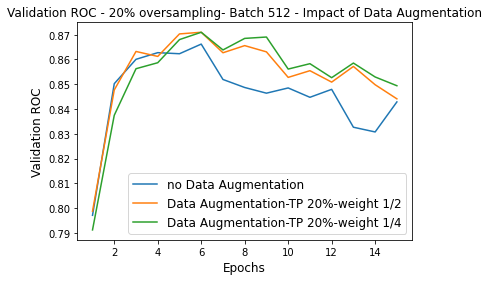

In [33]:
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_roc'], label='no Data Augmentation')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W2['val_roc'], label='Data Augmentation-TP 20%-weight 1/2')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W4['val_roc'], label='Data Augmentation-TP 20%-weight 1/4')

plt.title("Validation ROC - 20% oversampling- Batch 512 - Impact of Data Augmentation")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

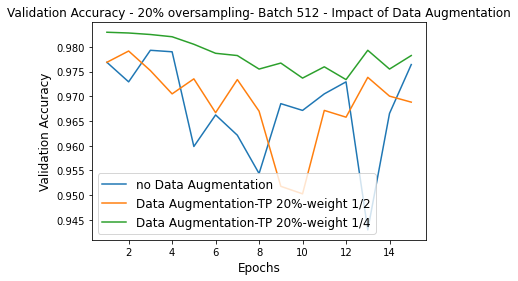

In [34]:
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_acc'], label='no Data Augmentation')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W2['val_acc'], label='Data Augmentation-TP 20%-weight 1/2')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W4['val_acc'], label='Data Augmentation-TP 20%-weight 1/4')

plt.title("Validation Accuracy - 20% oversampling- Batch 512 - Impact of Data Augmentation")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.show()

### Conclusion:
- Introducing data augmentation improves the ROC score for 5 Epochs but reduces the model accuracy. 
- Lowering the weights of the minority class help improve the accuracy to a comparable level in the base case, the lowering of weights does not reduct the maximum ROC the model reaches during validaiton. 


### Triple model as previously tested, transform probability 20%, lower batch size 256

In [74]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.2,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [75]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/4,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [76]:
FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP20_training")


 epoch: 0, train loss: 0.022941, val loss: 0.009742, train acc: 0.8308, val acc: 0.9830, val roc:0.8350



 epoch: 1, train loss: 0.018183, val loss: 0.007951, train acc: 0.8411, val acc: 0.9822, val roc:0.8595



 epoch: 2, train loss: 0.017124, val loss: 0.008556, train acc: 0.8440, val acc: 0.9811, val roc:0.8676



 epoch: 3, train loss: 0.015773, val loss: 0.010720, train acc: 0.8534, val acc: 0.9754, val roc:0.8598



 epoch: 4, train loss: 0.014874, val loss: 0.006552, train acc: 0.8591, val acc: 0.9798, val roc:0.8676



 epoch: 5, train loss: 0.014340, val loss: 0.006515, train acc: 0.8666, val acc: 0.9801, val roc:0.8664



 epoch: 6, train loss: 0.013404, val loss: 0.007101, train acc: 0.8721, val acc: 0.9781, val roc:0.8590



 epoch: 7, train loss: 0.012668, val loss: 0.008849, train acc: 0.8772, val acc: 0.9725, val roc:0.8562



 epoch: 8, train loss: 0.011732, val loss: 0.010572, train acc: 0.8872, val acc: 0.9664, val roc:0.8552



 epoch: 9, train loss: 0.011208, val loss: 0.006533, train acc: 0.8942, val acc: 0.9775, val roc:0.8561



 epoch: 10, train loss: 0.010454, val loss: 0.008126, train acc: 0.8995, val acc: 0.9722, val roc:0.8495



 epoch: 11, train loss: 0.009494, val loss: 0.008167, train acc: 0.9098, val acc: 0.9714, val roc:0.8395



 epoch: 12, train loss: 0.009499, val loss: 0.006120, train acc: 0.9141, val acc: 0.9776, val roc:0.8528



 epoch: 13, train loss: 0.008578, val loss: 0.007062, train acc: 0.9206, val acc: 0.9751, val roc:0.8428



 epoch: 14, train loss: 0.007547, val loss: 0.010039, train acc: 0.9337, val acc: 0.9673, val roc:0.8368
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP20_training.pth.tar saved.
Training Finished
Training and validation time: 281.1716949939728 seconds



### Triple model as previously tested,  batch size 512, transform probability 50%

In [77]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.5,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [78]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/4,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [79]:
FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP50_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP50_training")


 epoch: 0, train loss: 0.026510, val loss: 0.008938, train acc: 0.8237, val acc: 0.9830, val roc:0.7908



 epoch: 1, train loss: 0.019910, val loss: 0.010050, train acc: 0.8390, val acc: 0.9825, val roc:0.8347



 epoch: 2, train loss: 0.019302, val loss: 0.009785, train acc: 0.8334, val acc: 0.9827, val roc:0.8535



 epoch: 3, train loss: 0.018276, val loss: 0.011523, train acc: 0.8414, val acc: 0.9807, val roc:0.8577



 epoch: 4, train loss: 0.017901, val loss: 0.006908, train acc: 0.8422, val acc: 0.9830, val roc:0.8613



 epoch: 5, train loss: 0.017165, val loss: 0.009080, train acc: 0.8441, val acc: 0.9807, val roc:0.8585



 epoch: 6, train loss: 0.016145, val loss: 0.006555, train acc: 0.8509, val acc: 0.9808, val roc:0.8658



 epoch: 7, train loss: 0.015874, val loss: 0.015274, train acc: 0.8519, val acc: 0.9661, val roc:0.8640



 epoch: 8, train loss: 0.015653, val loss: 0.009634, train acc: 0.8593, val acc: 0.9772, val roc:0.8545



 epoch: 9, train loss: 0.015210, val loss: 0.006564, train acc: 0.8580, val acc: 0.9814, val roc:0.8600



 epoch: 10, train loss: 0.014848, val loss: 0.017664, train acc: 0.8606, val acc: 0.9560, val roc:0.8460



 epoch: 11, train loss: 0.015256, val loss: 0.006339, train acc: 0.8587, val acc: 0.9801, val roc:0.8591



 epoch: 12, train loss: 0.014311, val loss: 0.009054, train acc: 0.8643, val acc: 0.9749, val roc:0.8566



 epoch: 13, train loss: 0.014066, val loss: 0.007412, train acc: 0.8673, val acc: 0.9784, val roc:0.8524



 epoch: 14, train loss: 0.013463, val loss: 0.009970, train acc: 0.8711, val acc: 0.9723, val roc:0.8524
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP50_training.pth.tar saved.
Training Finished
Training and validation time: 433.9897747039795 seconds


### Triple model as previously tested,  batch size 256, transform probability 50%

In [80]:
#Using pretrained EfficientNet with last block unfrozen and trainable. No Data augmentation or oversamplign performed
# Oversampling parameter set to 0.02 as per original sampling proportion of 2% melanoma target data
train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.5,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 15

In [81]:
# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/4,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)

In [82]:
FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP50_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP50_training")


 epoch: 0, train loss: 0.023149, val loss: 0.009881, train acc: 0.8308, val acc: 0.9828, val roc:0.8342



 epoch: 1, train loss: 0.018428, val loss: 0.006661, train acc: 0.8425, val acc: 0.9828, val roc:0.8574



 epoch: 2, train loss: 0.017823, val loss: 0.007093, train acc: 0.8411, val acc: 0.9827, val roc:0.8703



 epoch: 3, train loss: 0.016513, val loss: 0.011021, train acc: 0.8518, val acc: 0.9779, val roc:0.8657



 epoch: 4, train loss: 0.015989, val loss: 0.007539, train acc: 0.8546, val acc: 0.9811, val roc:0.8558



 epoch: 5, train loss: 0.015445, val loss: 0.009770, train acc: 0.8566, val acc: 0.9746, val roc:0.8396



 epoch: 6, train loss: 0.014477, val loss: 0.006084, train acc: 0.8684, val acc: 0.9814, val roc:0.8533



 epoch: 7, train loss: 0.014323, val loss: 0.012128, train acc: 0.8652, val acc: 0.9676, val roc:0.8551



 epoch: 8, train loss: 0.013513, val loss: 0.007650, train acc: 0.8751, val acc: 0.9766, val roc:0.8539



 epoch: 9, train loss: 0.013391, val loss: 0.011706, train acc: 0.8725, val acc: 0.9656, val roc:0.8441



 epoch: 10, train loss: 0.012900, val loss: 0.008975, train acc: 0.8755, val acc: 0.9738, val roc:0.8387



 epoch: 11, train loss: 0.012016, val loss: 0.007808, train acc: 0.8836, val acc: 0.9740, val roc:0.8383



 epoch: 12, train loss: 0.011571, val loss: 0.008552, train acc: 0.8905, val acc: 0.9720, val roc:0.8473



 epoch: 13, train loss: 0.010873, val loss: 0.008853, train acc: 0.8968, val acc: 0.9708, val roc:0.8256



 epoch: 14, train loss: 0.010200, val loss: 0.006971, train acc: 0.9044, val acc: 0.9766, val roc:0.8432
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B256_A512x256_OS20_TP50_training.pth.tar saved.
Training Finished
Training and validation time: 467.57217502593994 seconds


In [35]:
res_tls_flg3_os20_b512_tp5_W4 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP50_training.pth.tar')


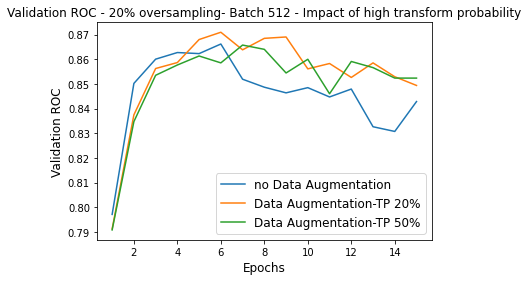

In [37]:
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_roc'], label='no Data Augmentation')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W4['val_roc'], label='Data Augmentation-TP 20%')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp5_W4['val_roc'], label='Data Augmentation-TP 50%')

plt.title("Validation ROC - 20% oversampling- Batch 512 - Impact of high transform probability")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

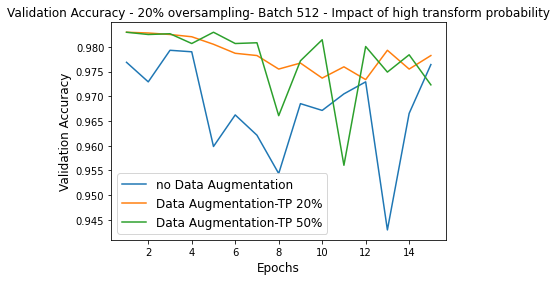

In [38]:
plt.plot(range(1,16),res_tls_flg3_os20_b512_W['val_acc'], label='no Data Augmentation')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W4['val_acc'], label='Data Augmentation-TP 20%')
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp5_W4['val_acc'], label='Data Augmentation-TP 50%')

plt.title("Validation Accuracy - 20% oversampling- Batch 512 - Impact of high transform probability")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.show()

### Conclusion:
- Higher transform probability for data augmentation reduces the performance of the model. 20% transfrom probability allows us to improve the performance of base model. 

### Impact of oversampling and data augmentation on model illustrated below:
-  Triple Sigmoid  L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3 Alpha=(0.5/4,0.5) 

- Triple Sigmoid Testing: L1:[1280,512] L2:[512,256] L3:[256,1] - Focal Loss Gamma=3 Alpha=(0.5/4,0.5) - Transform Prob 20%/ 20% oversampling

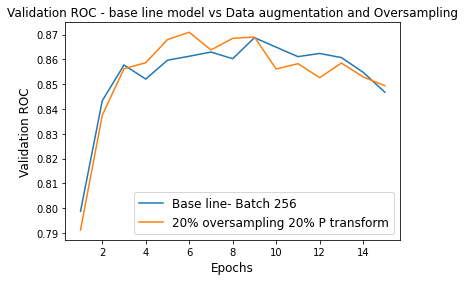

In [39]:
plt.plot(range(1,16),res_tls_flg3['val_roc'], label='Base line- Batch 256')# no data augmentation and no transfrom probability
plt.plot(range(1,16),res_tls_flg3_os20_b512_tp_W4['val_roc'], label='20% oversampling 20% P transform')

plt.title("Validation ROC - base line model vs Data augmentation and Oversampling")
plt.legend(fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation ROC", fontsize=12)
plt.show()

# Final model carried forward for Federated Learning:

#### Triple Sigmoid  L1:[1280,512] L2:[512,256] L3:[256,1] 
#### Focal Loss Gamma=3 
#### We will test with oversampling and data augmentation in a federated learning setting with the above parameters. Note: Alpha applied in instance of oversampling
    

In [12]:
train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=False,
                                            transform_prob=0,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=256, oversampling_ratio=0.02)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 5

# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3)
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)



In [13]:
FeatureDS_FocalLossG3_TLS_HLR_B256_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_E5_training")


 epoch: 0, train loss: 0.016135, val loss: 0.012186, train acc: 0.9698, val acc: 0.9830, val roc:0.7987



 epoch: 1, train loss: 0.013416, val loss: 0.011958, train acc: 0.9790, val acc: 0.9830, val roc:0.8433



 epoch: 2, train loss: 0.012163, val loss: 0.013393, train acc: 0.9804, val acc: 0.9828, val roc:0.8578



 epoch: 3, train loss: 0.012008, val loss: 0.011937, train acc: 0.9806, val acc: 0.9827, val roc:0.8521



 epoch: 4, train loss: 0.011123, val loss: 0.011068, train acc: 0.9805, val acc: 0.9828, val roc:0.8597
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_E5_training.pth.tar saved.
Training Finished
Training and validation time: 96.36178803443909 seconds


In [14]:
FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_test_results, FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_roc_curve_stat = test(t_model, test_loader=test_loader, device=device)

In [16]:
FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_test_results

{'test_accuracy': 0.9815086586439683,
 'test_roc_score': 0.8420577960051644,
 'CM': array([[3344,    0],
        [  63,    0]], dtype=int64)}

In [9]:

train_set,val_set,test_set = split_datasets(img_dir="Data/jpeg_crop_resize_256x256/train/",
                                            metadata_dir= "Data/Train_Metadata_Processed.csv",
                                            val_size=0.2,test_size=0.1,split_seed=0,transform=True,
                                            transform_prob=0.2,dataseed=0,X_as_feature=True,
                                            feature_dir="Data/feature_crop_resize_256x256/train/",
                                            use_memory_cache=True)
# Instantiate Dataloaders
train_loader, val_loader, test_loader= create_dataloaders(train_set=train_set, val_set=val_set,
                                                          test_set=test_set, batch_size=512, oversampling_ratio=0.2)


# Hyperparameters 
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 5

# Instantiate Model
t_model= TripleLinearSigmoid(n1=512,n2=256)
criterion=FocalLoss(gamma=3,alpha=(0.5/4,0.5))
optimizer= optim.Adam(t_model.parameters(), lr=learning_rate)



In [10]:
FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training= train_val_clip(t_model, train_loader, val_loader, epochs,
                                     optimizer, criterion, device,
                                                                   checkpoint_name="FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training")


 epoch: 0, train loss: 0.026344, val loss: 0.008708, train acc: 0.8237, val acc: 0.9830, val roc:0.7912



 epoch: 1, train loss: 0.019964, val loss: 0.009235, train acc: 0.8359, val acc: 0.9828, val roc:0.8375



 epoch: 2, train loss: 0.018920, val loss: 0.009916, train acc: 0.8343, val acc: 0.9825, val roc:0.8563



 epoch: 3, train loss: 0.017931, val loss: 0.009437, train acc: 0.8417, val acc: 0.9821, val roc:0.8587



 epoch: 4, train loss: 0.017004, val loss: 0.008063, train acc: 0.8426, val acc: 0.9805, val roc:0.8680
Saving checkpoint ... 
Checkpoint: ./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar saved.
Training Finished
Training and validation time: 143.26314854621887 seconds


In [11]:
FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_test_results, FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_roc_curve_stat = test(t_model, test_loader=test_loader, device=device)

In [15]:
FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_test_results

{'test_accuracy': 0.9785735250953919,
 'test_roc_score': 0.8483804207488419,
 'CM': array([[3334,   10],
        [  63,    0]], dtype=int64)}

In [18]:
res_tls_flg3_E5 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_E5_training.pth.tar')
res_tls_flg3_os20_b512_W_E5 = load_results('./TrainedEffNetcheckpoint_FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_training.pth.tar')


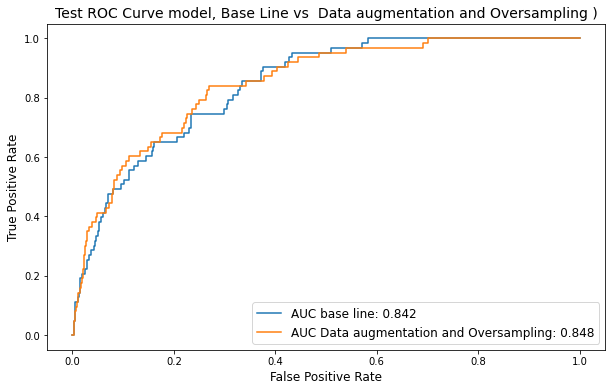

In [23]:

fig=plt.figure(figsize=(10,6))
AUC="{:.3f}".format(FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_roc_curve_stat['AUC'])
AUC_focal="{:.3f}".format(FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_roc_curve_stat['AUC'])
score= "AUC base line: " + str(AUC)
score_focal= "AUC Data augmentation and Oversampling: " + str(AUC_focal)

plt.plot(FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_roc_curve_stat['fpr'],FeatureDS_FocalLossG3_TLS_HLR_B256_A512x256_roc_curve_stat['tpr'], label=score)
plt.plot(FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_roc_curve_stat['fpr'],FeatureDS_FocalLossG3W4_TLS_HLR_B512_A512x256_OS20_TP20_roc_curve_stat['tpr'], label=score_focal)
plt.title("Test ROC Curve model, Base Line vs  Data augmentation and Oversampling )", fontsize=14)
plt.legend(fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.show()